<a href="https://colab.research.google.com/github/pratikjori20/Appliance-Energy-Prediction/blob/main/Individual_capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<B> Appliances Energy Prediction

## <B> Introduction

Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

In [1]:
# Import all necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing, model_selection, metrics
from sklearn import datasets, linear_model, metrics
from sklearn import ensemble

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

Mounting The Drive

In [2]:
# mount the drive on colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the Data

In [3]:
# read the data
path = "/content/drive/MyDrive/Copy of data_application_energy.csv"
df = pd.read_csv(path, parse_dates=['date'])

In [4]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
df.shape

(19735, 29)

In [6]:
df_1 = df
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [7]:
# Set the date index
df = df.set_index('date')

In [8]:
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Week'] = df.index.week

In [9]:
df.head(10)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Weekday,Day,Hour,Week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,11,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,11,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,11,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,11,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,11,17,2
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,...,5.333333,43.833333,4.800000,44.919484,44.919484,1,0,11,17,2
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,...,5.000000,40.000000,4.700000,47.233763,47.233763,1,0,11,18,2
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,...,5.166667,40.000000,4.683333,33.039890,33.039890,1,0,11,18,2
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,...,5.333333,40.000000,4.666667,31.455702,31.455702,1,0,11,18,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [11]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Weekday,Day,Hour,Week
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2.977249,16.057411,11.502002,11.393615
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,1.985617,8.450998,6.921953,5.657985
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000,1.000000,0.000000,2.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000,9.000000,6.000000,6.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000,16.000000,12.000000,11.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000,23.000000,17.000000,16.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,6.000000,31.000000,23.000000,21.000000


In [12]:
df.shape

(19735, 33)

Checking for NA

In [13]:
# Checking for null values

df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Month          0
Weekday        0
Day            0
Hour           0
Week           0
dtype: int64

EDA

In [ ]:
# Data visualisation

# understanding the timeseries variation of the applaince energy consumption

visData = go.Scatter(x = df_1.date, mode = 'lines', y = df_1.Appliances)
layout = go.Layout(title = 'Appliance energy consumption measurement', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [15]:
# adding column to mark  weekdays-0 and weekends-1 for time series evalution
df_1['WEEKDAY'] = ((pd.to_datetime(df_1['date']).dt.dayofweek)// 5 == 1).astype(float)
df_1['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [ ]:
# find the rows of weekday
a_weekday = df_1[df_1['WEEKDAY'] == 0]
# understanding the timeseries variation of the appliances energy consumption
visData = go.Scatter(x = a_weekday.date, mode = "lines", y = a_weekday.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekdays', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [ ]:
a_weekend = df_1[df_1['WEEKDAY'] == 1]
# understanding the timeseries variation of the appliances energy consumption
visData = go.Scatter(x = a_weekend.date, mode = "lines", y = a_weekend.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekends', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [18]:
# function to be used for plotting
def daily(x, energy_df=df):
  return energy_df.groupby('Weekday')[x].mean()

def hourly(x, energy_df=df):
  return energy_df.groupby('Hour')[x].mean()

def monthly_daily(x, energy_df=df):
  by_day = energy_df.pivot_table(index='Weekday', columns=['Month'], values=x, aggfunc='mean')
  return round(by_day, ndigits=2)

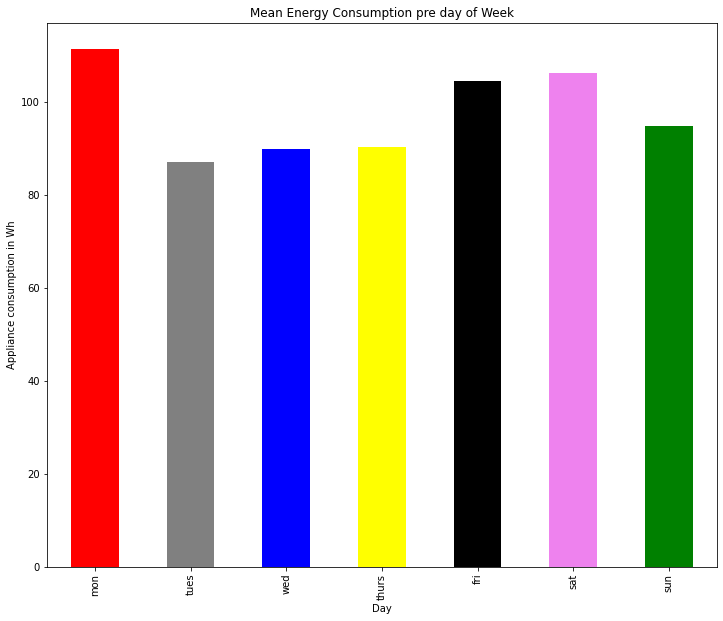

In [19]:
# plot of mean energy consumption per day of week
daily('Appliances').plot(kind = 'bar', color=['red','grey','blue','yellow','black','violet','green'], figsize = (12,10))
ticks = list(range(0,7,1))
labels = "mon tues wed thurs fri sat sun".split()
plt.xlabel('Day')
plt.ylabel('Appliance consumption in Wh')
plt.title('Mean Energy Consumption pre day of Week')
plt.xticks(ticks, labels);

The energy consumption is bit high on monday, friday, saturday than the othere day

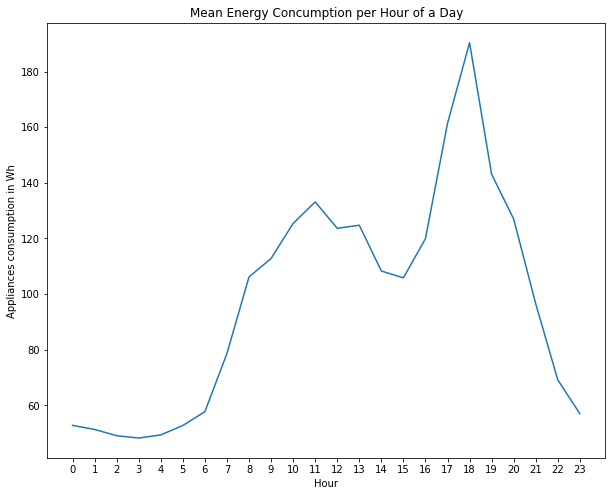

In [20]:
# mean energy consumption per hour of the day
hourly('Appliances').plot(figsize = (10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0,24,1))
plt.title('Mean Energy Concumption per Hour of a Day')
plt.xticks(ticks);

At night itme from 22:00 to 7:00 the energy consumption is below 80Wh, as the most of appliances are off or on stand-by. Between 9:00 to 13:00 the energy consumotion is 120Wh-135Wh and after lunch time reduces again to 110Wh at afternoon, the energy consumption is 130Wh-185Wh as family members arre at home and many devices are on.

In [21]:
df_1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'WEEKDAY'],
      dtype='object')

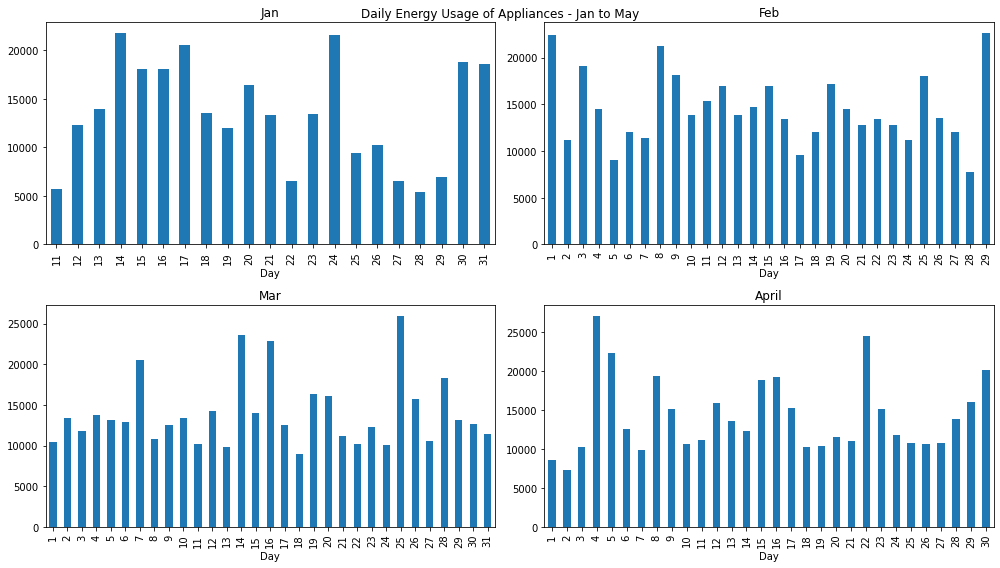

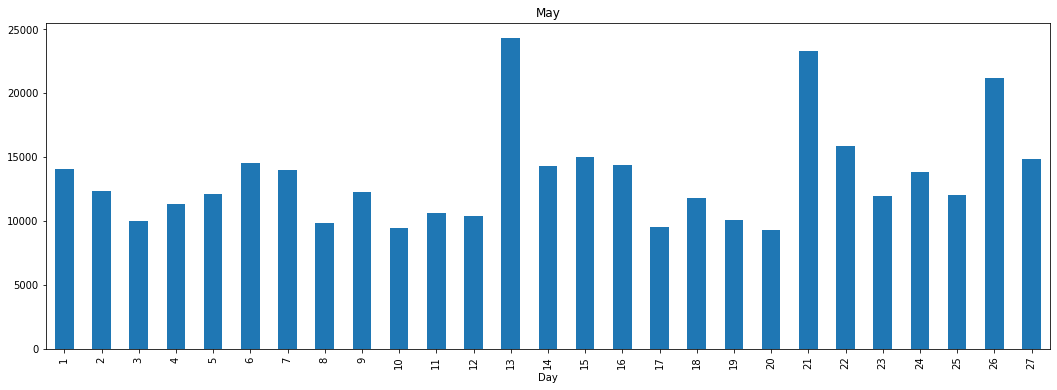

In [22]:
# daily energy usages of appliances from jan-may
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax = ax.flatten()
months =['Jan', 'Feb', 'Mar', 'April']
for i in range(1,5):
  df.query(f"Month == {i}")[['Day','Appliances']].groupby('Day')['Appliances'].sum().plot.bar(ax=ax[i-1], title = months[i-1])

plt.suptitle('Daily Energy Usage of Appliances - Jan to May')
plt.tight_layout()
plt.show()

plt.figure(figsize = (18,6))
df.query("Month == 5")[['Day','Appliances']].groupby('Day')['Appliances'].sum().plot.bar(title = 'May')
plt.show()

*   Weekend energy usage is low or high as compare to average day.

*   Some of the months are showing higher energy usage for pre-weekends.

Finding the Outliers

The number of the 0, 1% top values of appliances' load is 19 and they have power load higher than 790 Wh


Text(0.5, 1.0, 'Appliances energy consumption distribution')

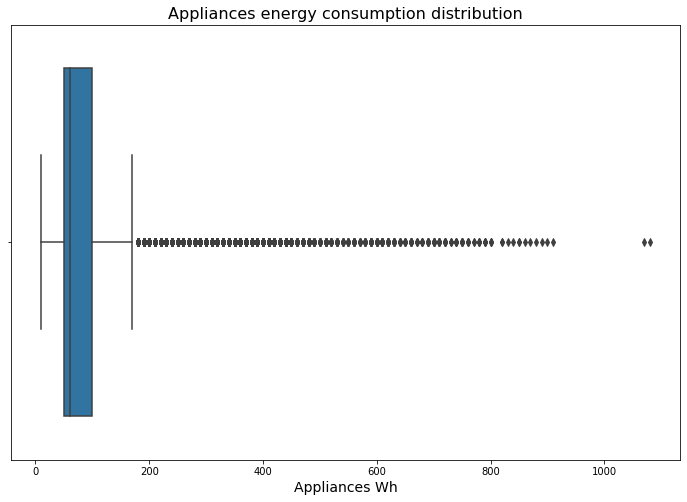

In [23]:
# finding the outliers
sorted_appliances = df.sort_values('Appliances', ascending = False)
print("The number of the 0, 1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),
      "and they have power load higher than", sorted_appliances.Appliances[19],
      "Wh")

#boxplot for appliances energy consumption
plt.figure(figsize =(12,8))
sns.boxplot(x='Appliances', data=df)
plt.xlabel('Appliances Wh', fontsize=14)
plt.title('Appliances energy consumption distribution', fontsize=16)

In [24]:
#removel of outliers
drop_df = df.drop(df[(df.Appliances>790)|(df.Appliances<0)].index)
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [25]:
drop_df = drop_df.drop('Month', axis=1)
drop_df = drop_df.drop('Weekday', axis=1)
drop_df = drop_df.drop('Week', axis=1)

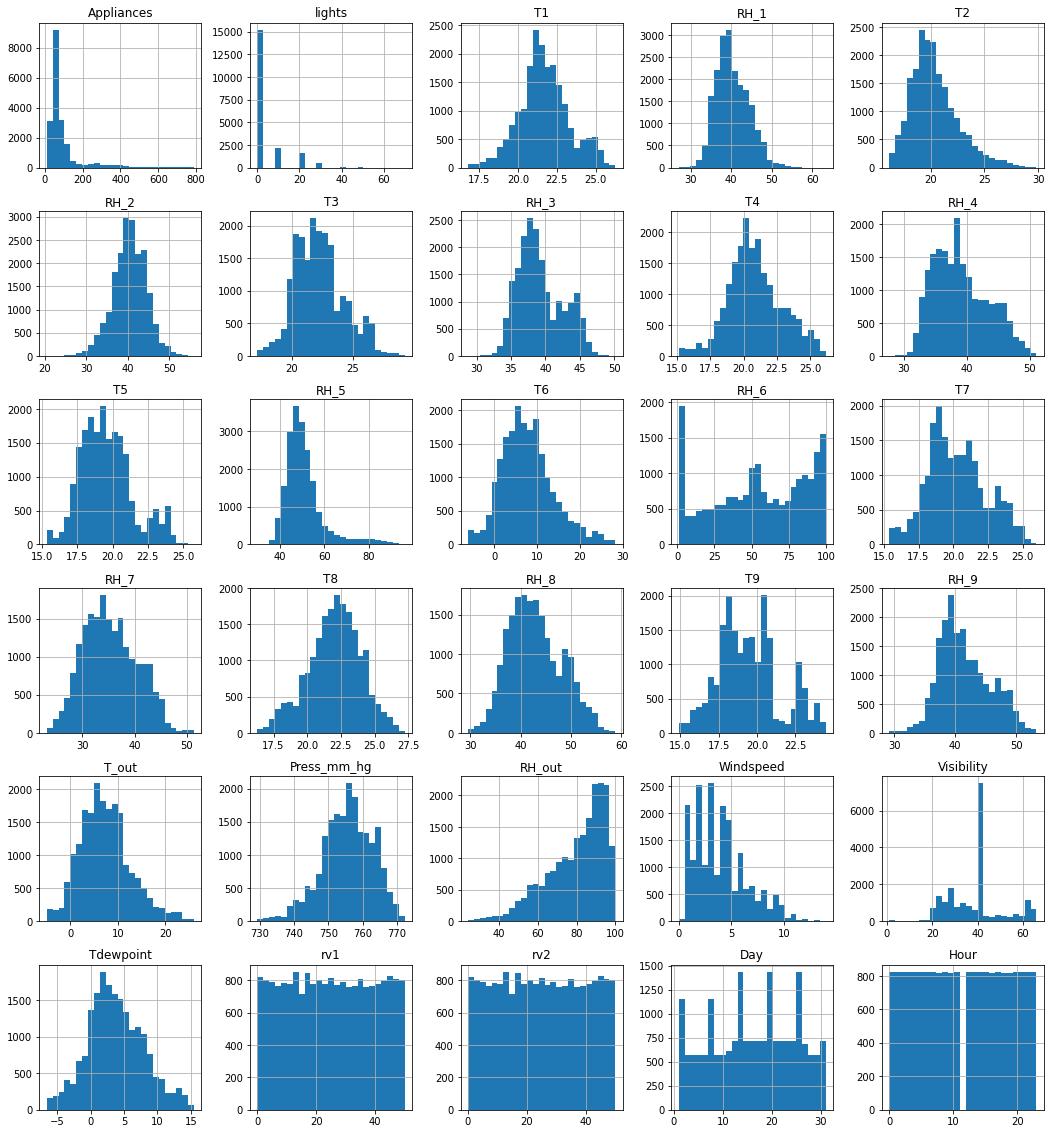

In [26]:
# hist of all the features to undrstand the distribution
drop_df.hist(bins = 25, figsize = (18,20));

The displots for RH_6, RH_out, Visibility, Windspeed are in focussed due to irregular distribution. It help us to visualize the data better.

In [27]:
drop_df['log_appliances'] = np.log(drop_df.Appliances)

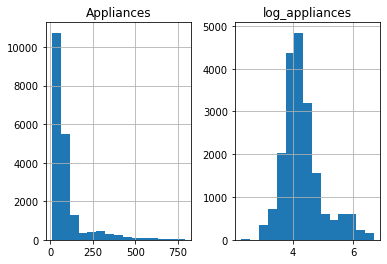

In [28]:
appliance = ['Appliances', 'log_appliances']
appliance = drop_df[appliance]
appliance.hist(bins=15);



*   Appliance hist plot of time series, it shown seasonality component is decreasing it may suggest an exponential decrease from season to season. A log transform can be used to flatten out exponential changes to linear relationship. 
*   We are looking at the mean and variance, we are assume that the data conform Gaussian(bell or noraml curve). Appliance log histogram plot from the time series the ball curve-like shape of the Gaussian distribution, perhaps with longer right tail.



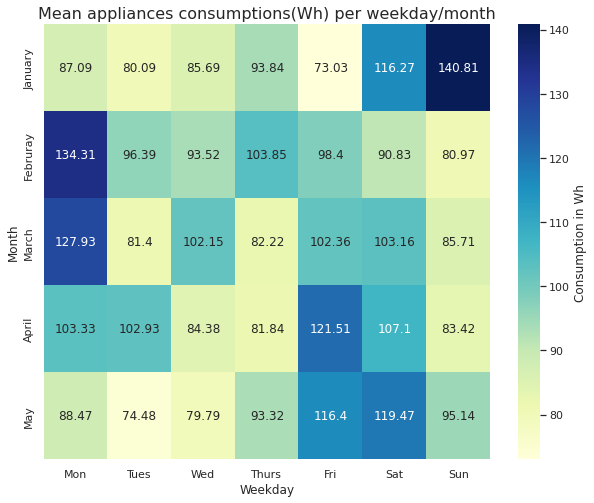

In [29]:
# heatmap mean applianceconsumption per weekday of month
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(monthly_daily('Appliances').T,cmap='YlGnBu',
                 xticklabels= 'Mon Tues Wed Thurs Fri Sat Sun'.split(),
                 yticklabels= 'January Februray March April May'.split(),
                 annot=True, fmt='g',
                 cbar_kws= {'label': 'Consumption in Wh'}).set_title('Mean appliances consumptions(Wh) per weekday/month').set_fontsize('16')
plt.show()

As we see from the heatmap we can say that the more power is consumed on mon, fri, sat and sun is valid for each month, however in this dataset we have only 4.5 monthd and from that we can't use months as feature for our model.

In [30]:
# correlation matrix of all the attributes
drop_df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Day,Hour,log_appliances
Appliances,1.000000,0.198201,0.058996,0.087890,0.122590,-0.058680,0.088211,0.037644,0.043280,0.017365,...,-0.039059,-0.155689,0.090528,-0.004157,0.017180,-0.012404,-0.012404,-0.000418,0.219468,0.904056
lights,0.198201,1.000000,-0.022727,0.107266,-0.004990,0.051428,-0.096397,0.131253,-0.008049,0.115113,...,-0.011491,0.068215,0.060741,0.019347,-0.035632,0.000627,0.000627,-0.042234,0.255219,0.261356
T1,0.058996,-0.022727,1.000000,0.163976,0.836827,-0.002565,0.892423,-0.028357,0.876984,0.098001,...,-0.149993,-0.345160,-0.087680,-0.075679,0.571435,-0.006107,-0.006107,-0.127037,0.178995,0.162862
RH_1,0.087890,0.107266,0.163976,1.000000,0.269801,0.797675,0.253182,0.844803,0.105981,0.880435,...,-0.293908,0.274344,0.204946,-0.020756,0.639078,-0.000530,-0.000530,-0.041459,0.018695,0.084759
T2,0.122590,-0.004990,0.836827,0.269801,1.000000,-0.165586,0.735194,0.121740,0.761939,0.231678,...,-0.132719,-0.505242,0.052724,-0.069587,0.582594,-0.010844,-0.010844,-0.157141,0.254971,0.215863
RH_2,-0.058680,0.051428,-0.002565,0.797675,-0.165586,1.000000,0.137318,0.678418,-0.047445,0.721560,...,-0.255419,0.585199,0.068929,-0.004746,0.499169,0.006183,0.006183,0.037354,-0.183140,-0.092709
T3,0.088211,-0.096397,0.892423,0.253182,0.735194,0.137318,1.000000,-0.011087,0.852852,0.122852,...,-0.189364,-0.281216,-0.101017,-0.101767,0.645966,-0.005355,-0.005355,-0.077204,0.037630,0.168772
RH_3,0.037644,0.131253,-0.028357,0.844803,0.121740,0.678418,-0.011087,1.000000,-0.140469,0.899024,...,-0.233397,0.356199,0.263070,0.017251,0.414461,-0.000403,-0.000403,-0.048443,-0.052265,-0.006320
T4,0.043280,-0.008049,0.876984,0.105981,0.761939,-0.047445,0.852852,-0.140469,1.000000,-0.048743,...,-0.074852,-0.388413,-0.185935,-0.104360,0.519326,-0.001759,-0.001759,-0.121880,0.088623,0.134139
RH_4,0.017365,0.115113,0.098001,0.880435,0.231678,0.721560,0.122852,0.899024,-0.048743,1.000000,...,-0.250814,0.336899,0.300231,0.002871,0.616532,-0.001736,-0.001736,-0.005483,-0.018885,-0.006633


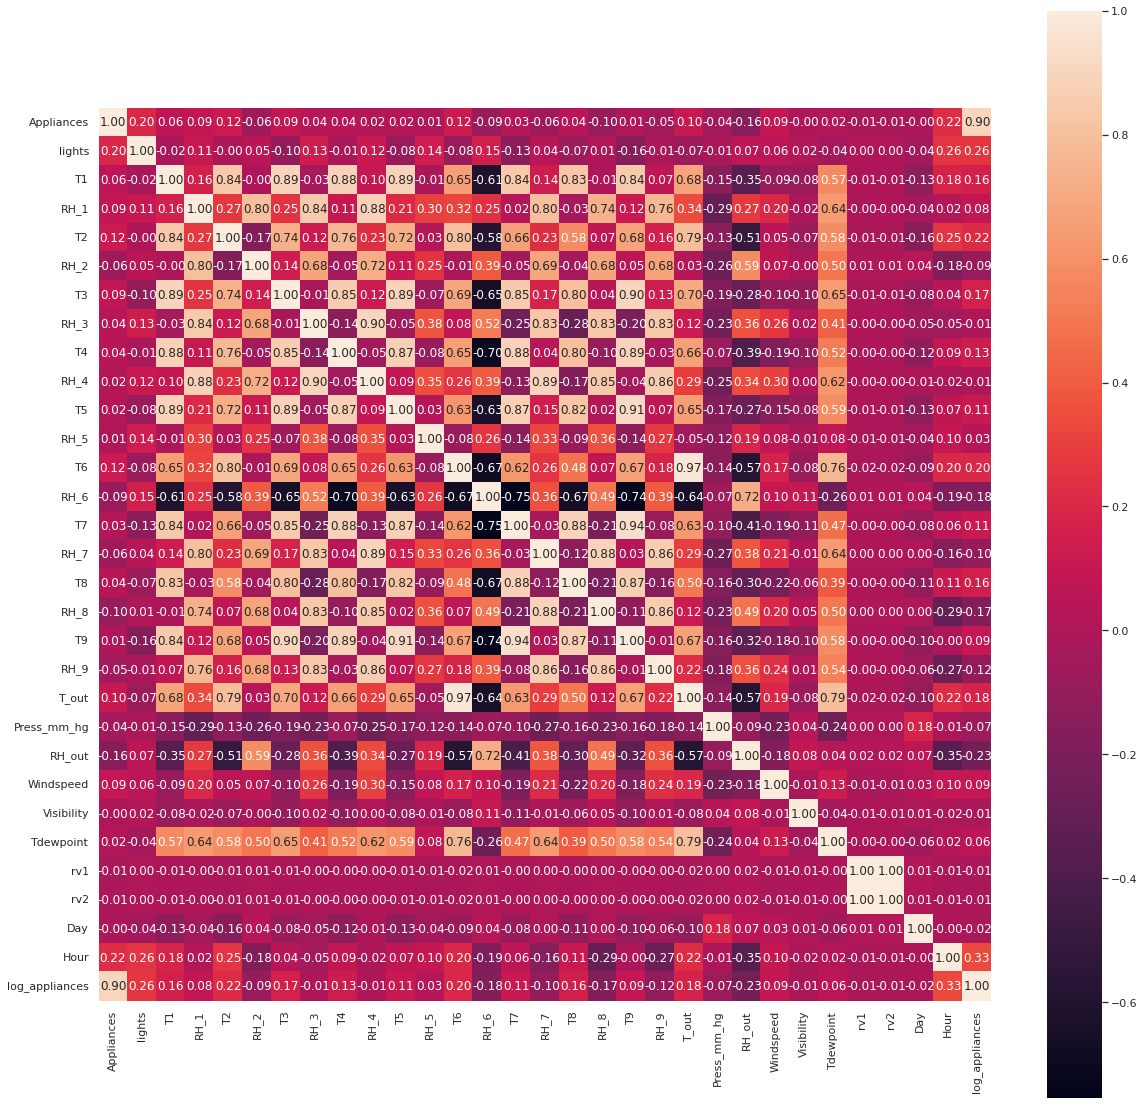

In [31]:
# plotting correlation matrix
corr = drop_df.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale = 1)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f')
plt.show()

From this we examine linear dependence among some basic feature in this dataset. In linear regression problem only linear independent variables can be used as feature to explain consumption inn other way we will have multicollinearity issue.

Multicollinearity

In [32]:
# checking the multicollinearity

def redundant_pairs(energy):
  ''' Get diagonal and lower tringular pairs of correlation matrix'''
  pairs_to_drop = set()
  colms = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((colms[i], colms[j]))
  return pairs_to_drop

# function to get top correlations

def top_abs_corre(df, n=5):
  au_corr = df.corr().abs().unstack()
  labels_drop = redundant_pairs(df)
  au_corr = au_corr.drop(labels = labels_drop).sort_values(ascending=False)
  return au_corr[0:n]

print('Top Absolute Correlations')
print(top_abs_corre(df, 40))

Top Absolute Correlations
rv1    rv2      1.000000
Month  Week     0.977385
T6     T_out    0.974787
T7     T9       0.944776
T5     T9       0.911055
T3     T9       0.901324
RH_3   RH_4     0.898978
RH_4   RH_7     0.894301
T1     T3       0.892402
T9     Month    0.890605
T4     T9       0.889439
T9     Week     0.888777
T3     T5       0.888169
T1     T5       0.885247
RH_7   RH_8     0.883984
T7     T8       0.882123
RH_1   RH_4     0.880359
T4     T7       0.877763
T1     T4       0.877001
T4     T5       0.871813
T5     T7       0.870624
T8     T9       0.869338
RH_7   RH_9     0.858686
RH_4   RH_9     0.856591
RH_8   RH_9     0.855812
T3     T4       0.852778
       T7       0.847374
RH_4   RH_8     0.847259
T1     T9       0.844777
RH_1   RH_3     0.844677
T1     T7       0.838705
       T2       0.836834
T7     Week     0.835119
RH_3   RH_9     0.833538
T7     Month    0.833005
RH_3   RH_7     0.832685
       RH_8     0.828822
T1     T8       0.825413
T5     T8       0.824981

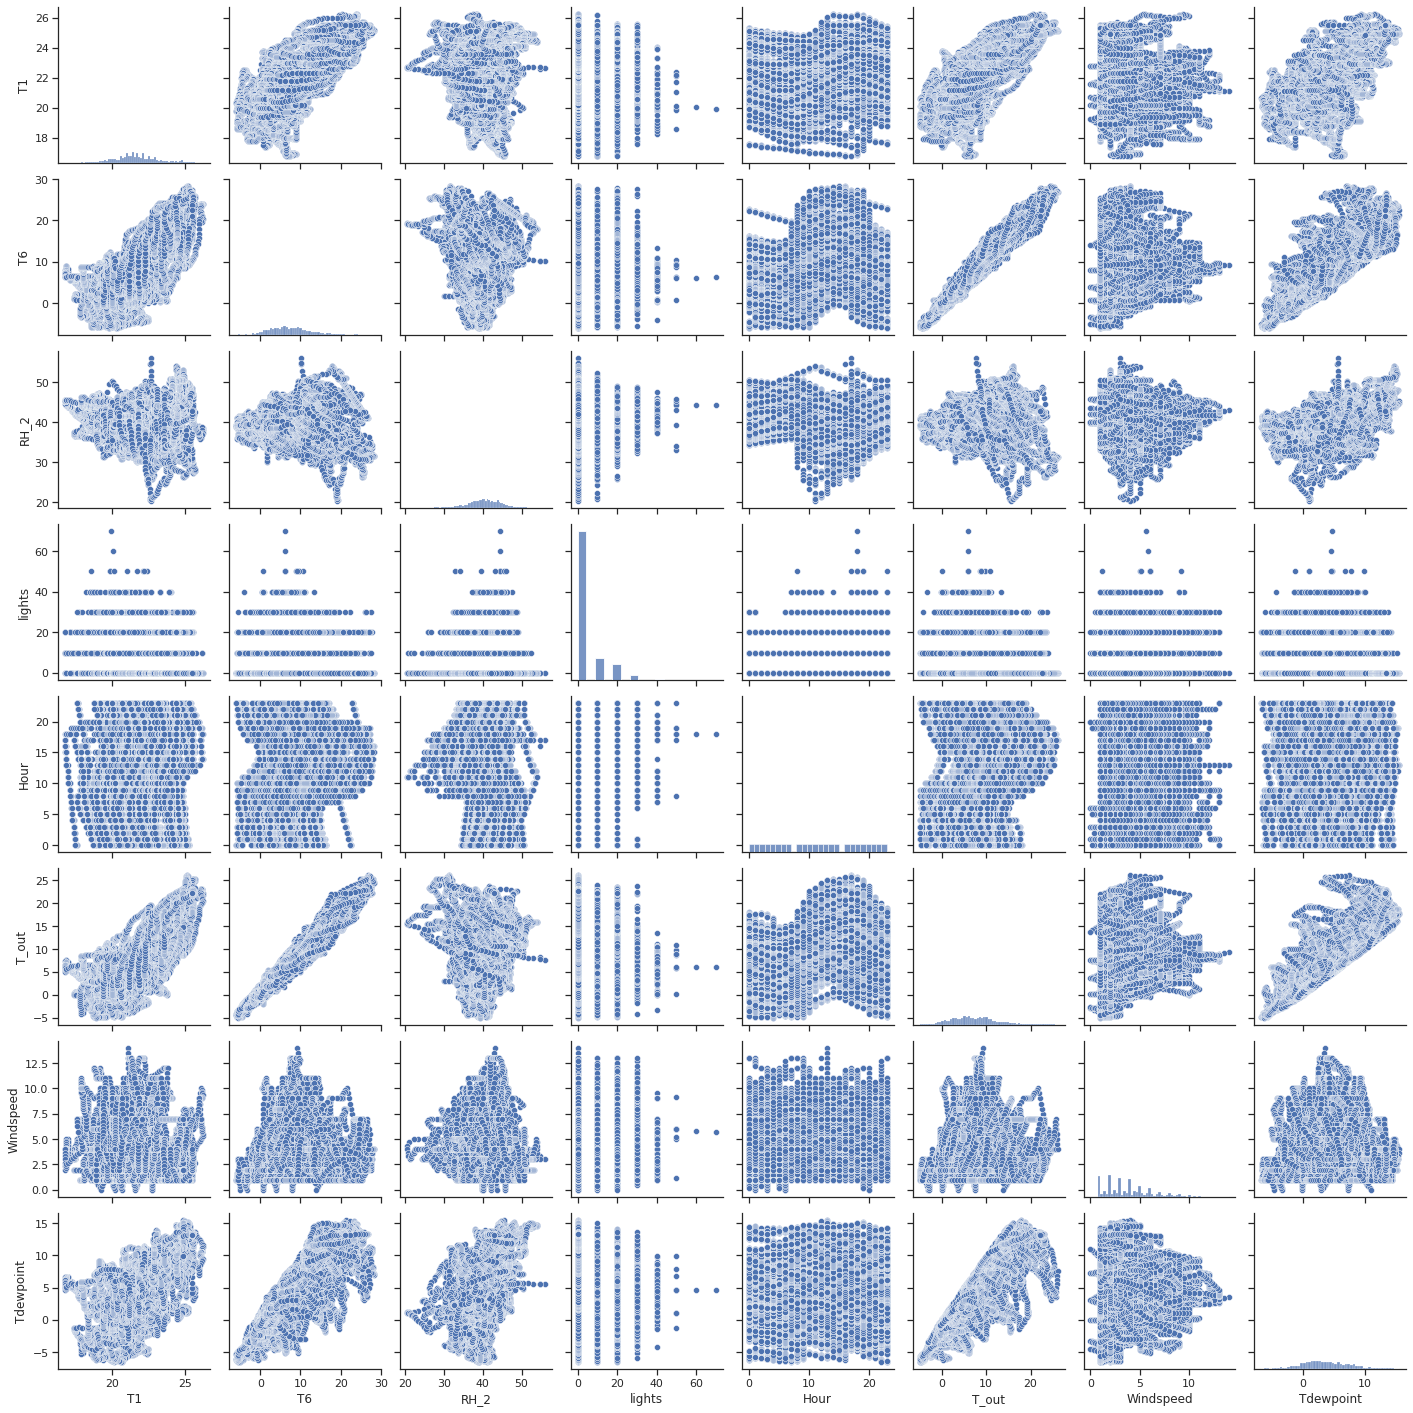

In [33]:
col = ['T1', 'T6', 'RH_2', 'lights', 'Hour', 'T_out', 'Windspeed', 'Tdewpoint']
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(drop_df[col])
plt.show();

Column Management

In [34]:
# managing the column
temperature = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
humidity = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
weather = ['T_out', 'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility']
lights = ['lights']
hour = ['Hour']
random = ['rv1', 'rv2']
appliance = ['Appliances']
app_class = ['Appliances_class']

In [35]:
feature = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'lights']
feature_1 = drop_df[feature]
target_1 = drop_df[appliance]

In [36]:
feature_1.head()

,T1,T2,T3,T4,T5,T6,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,Tdewpoint,RH_out,Press_mm_hg,Windspeed,lights
date,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.89,19.2,19.79,19.000000,17.166667,7.026667,47.596667,44.790000,44.730000,45.566667,55.20,84.256667,5.3,92.0,733.5,7.000000,30
2016-01-11 17:10:00,19.89,19.2,19.79,19.000000,17.166667,6.833333,46.693333,44.722500,44.790000,45.992500,55.20,84.063333,5.2,92.0,733.6,6.666667,30
2016-01-11 17:20:00,19.89,19.2,19.79,18.926667,17.166667,6.560000,46.300000,44.626667,44.933333,45.890000,55.09,83.156667,5.1,92.0,733.7,6.333333,30
2016-01-11 17:30:00,19.89,19.2,19.79,18.890000,17.166667,6.433333,46.066667,44.590000,45.000000,45.723333,55.09,83.423333,5.0,92.0,733.8,6.000000,40
2016-01-11 17:40:00,19.89,19.2,19.79,18.890000,17.200000,6.366667,46.333333,44.530000,45.000000,45.530000,55.09,84.893333,4.9,92.0,733.9,5.666667,40


In [37]:
x1_train, x1_test, y1_train, y1_test = train_test_split(feature_1, target_1, test_size = 0.2, random_state = 0)

Scaling

In [38]:
# scaling the data
scaler = StandardScaler()

x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)
y1_train = scaler.fit_transform(y1_train)
y1_test = scaler.transform(y1_test)

Cost Function

In [39]:
# cost function
def costfuct(datafile, datatarget, coeffmatrix):
  datalength  = len(datafile);
  costvalue = np.sum(((datafile.dot(coeffmatrix.T)) - datatarget) ** 2) / (2 * datalength);
  return costvalue;

Gradient Descent Function for fixed Threshold

In [40]:
# gradient descent function for fixed threshold

from numpy.lib.function_base import gradient
def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  list1 = [0.0000001];
  cost1 = []

  for k in list1:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost1.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory

Linear Regression Function for Different Learning Rate

In [41]:
# linear regression function

def devlinearmodel(datafile, datatarget):
  list2 = [0.2, 0.1, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005];
  for learning_rate in list2:
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, learning_rate, 50000);

Predict

In [42]:
# predict

def predict(testdata, coeffmatrix):
  predictedtarget = testdata.dot(coeffmatrix.T);
  return predictedtarget;


MSE

In [43]:
# MSE
def calcMSE(testtarget, predictedtarget):
  modelRSME = (sum((testtarget - predictedtarget) ** 2) / len(testtarget));
  return modelRSME;

R-Square

In [44]:
# R-square
def modelRsquared(testtarget, predictedtarget):
  targetmean = np.mean(testtarget);
  totalSSE = np.sum((testtarget - targetmean) ** 2);
  residualSSE = np.sum((testtarget - predictedtarget) **2);
  rSquared = 1 - (residualSSE / totalSSE);
  return rSquared;

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 949 

Model Cost 0.4283398522552198 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


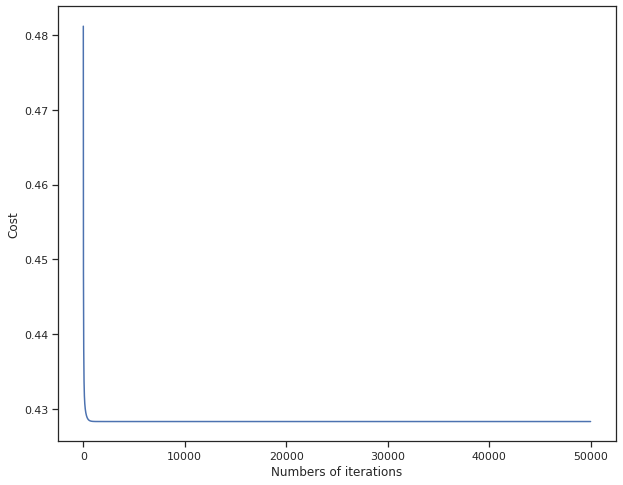

In [45]:
# model train for alpha = 0.2
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
linearmodel_tr1 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 1670 

Model Cost 0.42835649869031517 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.1


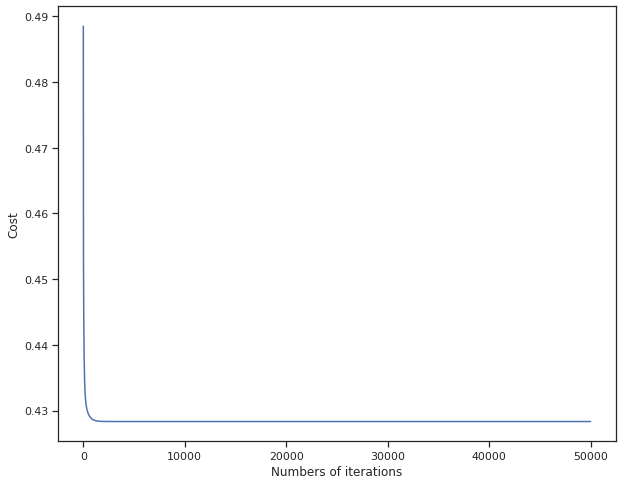

In [46]:
# model train for alpha = 0.1
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.1, 50000);
    return coeffmatrix;
linearmodel_tr2 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 9095 

Model Cost 0.4286539599978343 

Model Coefficients: 
[[ 0.15543703 -0.36397003  0.40727274 -0.21807978 -0.08016989  0.27741976
   0.68921594 -0.52702265  0.03207858 -0.21868968  0.01533636  0.02300919
  -0.2253739   0.04589768  0.00943405  0.04087216  0.2064437 ]]
alpha: 0.01


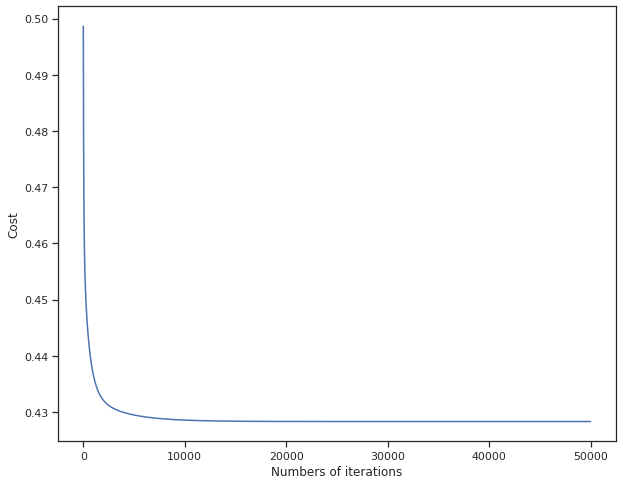

In [47]:
# model train for alpha = 0.01
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.01, 50000);
    return coeffmatrix;
linearmodel_tr3 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 13689 

Model Cost 0.42897820210573434 

Model Coefficients: 
[[ 0.14877362 -0.35298728  0.40814268 -0.219285   -0.08051568  0.2706115
   0.68312006 -0.51891501  0.03169797 -0.22076859  0.0152544   0.02326532
  -0.22095437  0.04230056  0.00938533  0.04085098  0.20675966]]
alpha: 0.005


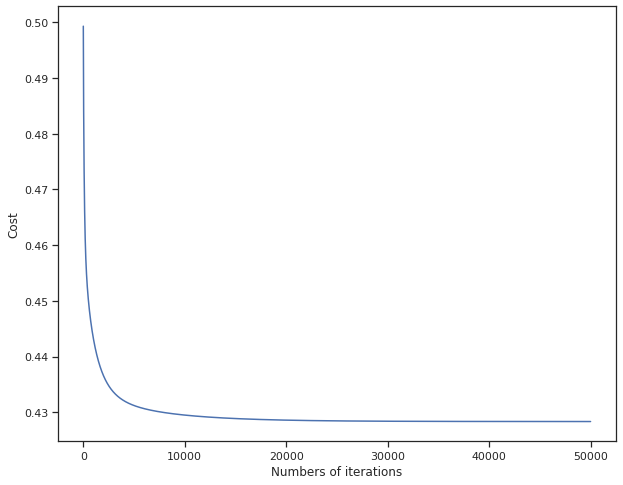

In [48]:
# model train for alpha = 0.005
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.005, 50000);
    return coeffmatrix;
linearmodel_tr4 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 912 

Model Cost 0.3534201546664343 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


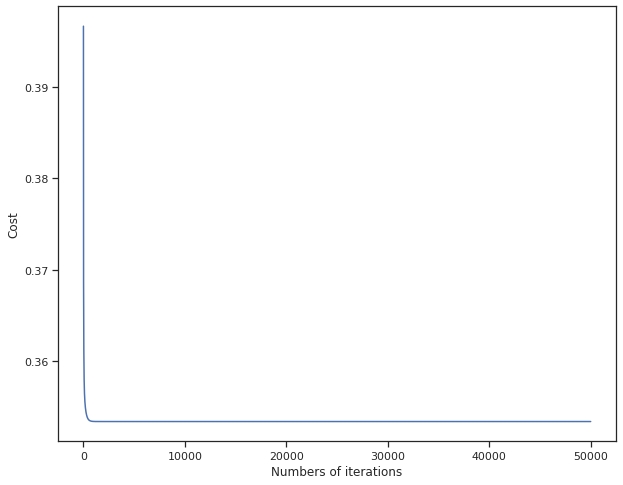

In [49]:
# model test for alpha = 0.2
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
linearmodel_te1 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 1607 

Model Cost 0.3534359815669455 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.1


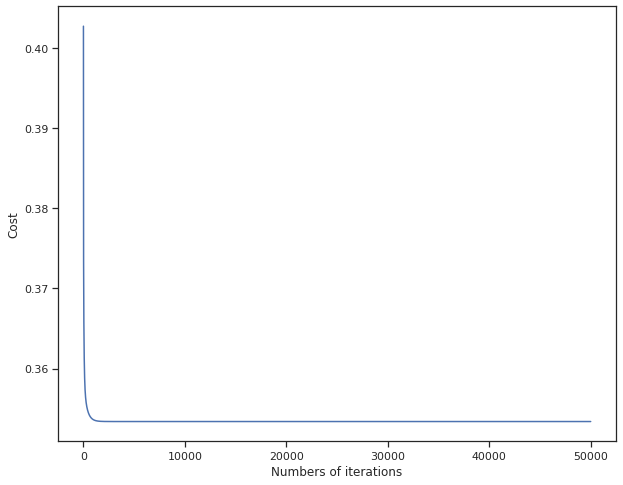

In [50]:
# model test for alpha = 0.1
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.1, 50000);
    return coeffmatrix;
linearmodel_te2 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 8777 

Model Cost 0.3537213824348875 

Model Coefficients: 
[[ 0.19339874 -0.39439876  0.33186961 -0.19745566 -0.08094932  0.31630279
   0.58035075 -0.44366215  0.03171907 -0.16859217  0.0337347  -0.02004285
  -0.22436798  0.04989584 -0.0044603   0.02699757  0.20087736]]
alpha: 0.01


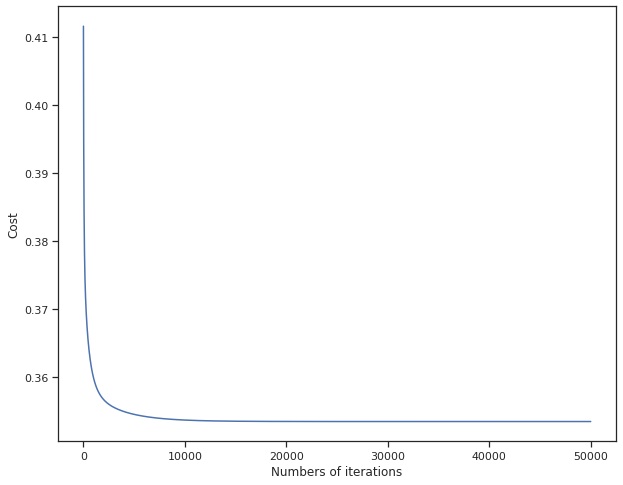

In [51]:
# model test for alpha = 0.01
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.01, 50000);
    return coeffmatrix;
linearmodel_te3 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 13210 

Model Cost 0.3540344685752189 

Model Coefficients: 
[[ 0.18802689 -0.38535547  0.33263277 -0.19843466 -0.08147188  0.31078818
   0.57551655 -0.43694745  0.03128939 -0.1703459   0.03367715 -0.01985653
  -0.2208762   0.04696083 -0.00455896  0.02694334  0.20117008]]
alpha: 0.005


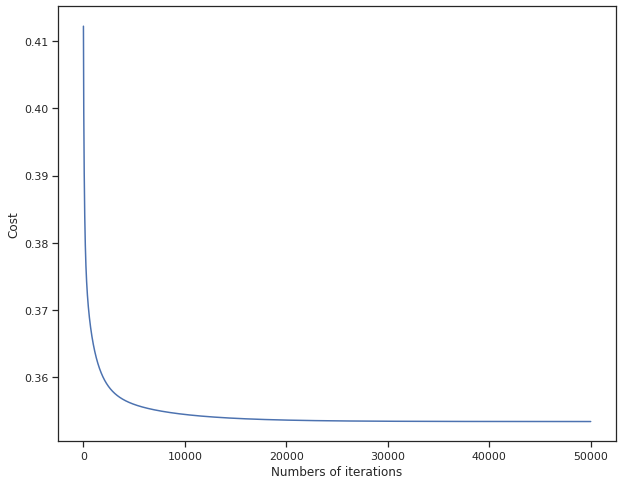

In [52]:
# model test for alpha = 0.005
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.005, 50000);
    return coeffmatrix;
linearmodel_te4 = devlinearmodel(x1_test, y1_test)

In [53]:
reg = linear_model.LinearRegression()
# train the model using train sets
reg.fit(x1_train, y1_train)
# regression corfficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 949 

Model Cost 0.4283398522552198 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


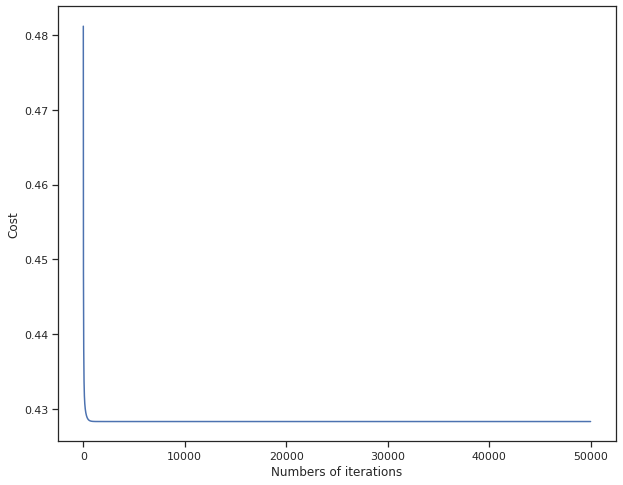

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 912 

Model Cost 0.3534201546664343 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


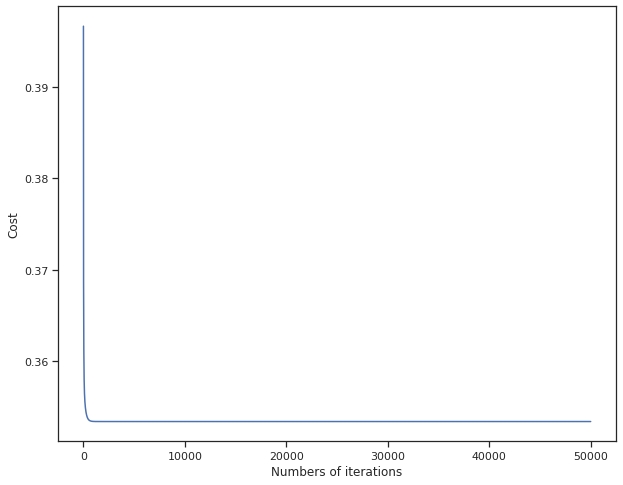

In [54]:
# linear regression for best alpha value
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_trbe = devlinearmodel(x1_train, y1_train)
linearmodel_tebe = devlinearmodel(x1_test, y1_test)

In [55]:
predictedtarget_tr1 = predict(x1_train, linearmodel_tr1)
predictedtarget_tr2 = predict(x1_train, linearmodel_tr2)
predictedtarget_tr3 = predict(x1_train, linearmodel_tr3)
predictedtarget_tr4 = predict(x1_train, linearmodel_tr4)

modelMSE_tr1 = calcMSE(y1_train, predictedtarget_tr1)
modelMSE_tr2 = calcMSE(y1_train, predictedtarget_tr2)
modelMSE_tr3 = calcMSE(y1_train, predictedtarget_tr3)
modelMSE_tr4 = calcMSE(y1_train, predictedtarget_tr4)

In [56]:
print ('Model MSE Train1 alpha 0.2:', modelMSE_tr1, '\n')
print ('Model MSE Train2 alpha 0.1:', modelMSE_tr2, '\n')
print ('Model MSE Train3 alpha 0.01:', modelMSE_tr3, '\n')
print ('Model MSE Train4 alpha 0.005:', modelMSE_tr4, '\n')

Model MSE Train1 alpha 0.2: [0.85664635] 

Model MSE Train2 alpha 0.1: [0.85664635] 

Model MSE Train3 alpha 0.01: [0.85664635] 

Model MSE Train4 alpha 0.005: [0.85665191] 



In [57]:
predictedtarget_te1 = predict(x1_test, linearmodel_te1)
predictedtarget_te2 = predict(x1_test, linearmodel_te2)
predictedtarget_te3 = predict(x1_test, linearmodel_te3)
predictedtarget_te4 = predict(x1_test, linearmodel_te4)

modelMSE_te1 = calcMSE(y1_test, predictedtarget_te1)
modelMSE_te2 = calcMSE(y1_test, predictedtarget_te2)
modelMSE_te3 = calcMSE(y1_test, predictedtarget_te3)
modelMSE_te4 = calcMSE(y1_test, predictedtarget_te4)

In [58]:
print ('Model MSE Test1 alpha 0.2:', modelMSE_te1, '\n')
print ('Model MSE Test2 alpha 0.1:', modelMSE_te2, '\n')
print ('Model MSE Test3 alpha 0.01:', modelMSE_te3, '\n')
print ('Model MSE Test4 alpha 0.005:', modelMSE_te4, '\n')

Model MSE Test1 alpha 0.2: [0.7068085] 

Model MSE Test2 alpha 0.1: [0.7068085] 

Model MSE Test3 alpha 0.01: [0.7068085] 

Model MSE Test4 alpha 0.005: [0.70681236] 



In [59]:
modelR1_tr1 = modelRsquared(y1_train, predictedtarget_tr1)
modelR1_tr2 = modelRsquared(y1_train, predictedtarget_tr2)
modelR1_tr3 = modelRsquared(y1_train, predictedtarget_tr3)
modelR1_tr4 = modelRsquared(y1_train, predictedtarget_tr4)

In [60]:
print('Model R-Squared Training:', '\n', modelR1_tr1, '\n', modelR1_tr2, '\n', modelR1_tr3, '\n', modelR1_tr4, '\n')

Model R-Squared Training: 
 0.14335364969173814 
 0.14335364969173814 
 0.1433536465978672 
 0.1433480885485865 



In [61]:
modelR1_te1 = modelRsquared(y1_test, predictedtarget_te1)
modelR1_te2 = modelRsquared(y1_test, predictedtarget_te2)
modelR1_te3 = modelRsquared(y1_test, predictedtarget_te3)
modelR1_te4 = modelRsquared(y1_test, predictedtarget_te4)

In [62]:
print('Model R-Squared Testing:', '\n', modelR1_te1, '\n', modelR1_te2, '\n', modelR1_te3, '\n', modelR1_te4, '\n')

Model R-Squared Testing: 
 0.14179755593582466 
 0.14179755593582466 
 0.14179755413419715 
 0.14179287794396722 



Classification

In [63]:
# classification

feature_a = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'RH_1', 'Hour', 'RH_2', 'RH_3', 'RH_5', 'RH_6', 'RH_8', 'RH_out', 'Press_mm_hg', 'lights']
feature_a1 = drop_df[feature_a]

In [64]:
drop_df['Appliances_class'] = np.where(drop_df['Appliances'] >= 60, 1, 0)
drop_df['Appliances_class'] = drop_df['Appliances_class'].astype('category')

In [65]:
target_2 = drop_df['Appliances_class']
target_2.head()

date
2016-01-11 17:00:00    1
2016-01-11 17:10:00    1
2016-01-11 17:20:00    0
2016-01-11 17:30:00    0
2016-01-11 17:40:00    1
Name: Appliances_class, dtype: category
Categories (2, int64): [0, 1]

In [66]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(feature_a1, target_2, test_size = 0.20, random_state = 0)

Gredient Boost Classifier

In [67]:
# gradeint boosting classifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
classi_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.25]
for learning_rate in classi_list:
  gb_classi = GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, max_features = 2, max_depth = 2, random_state = 0)
  gb_classi.fit(X_train_1, Y_train_1)

  print('Learning rate: ', learning_rate)
  print('Accuracy score(train): {0:.3f}'.format(gb_classi.score(X_train_1, Y_train_1)))
  print('Accuracy score(test): {0:.3f}'.format(gb_classi.score(X_test_1, Y_test_1)))


Learning rate:  0.05
Accuracy score(train): 0.696
Accuracy score(test): 0.681
Learning rate:  0.075
Accuracy score(train): 0.737
Accuracy score(test): 0.721
Learning rate:  0.1
Accuracy score(train): 0.748
Accuracy score(test): 0.738
Learning rate:  0.25
Accuracy score(train): 0.770
Accuracy score(test): 0.754
Learning rate:  0.5
Accuracy score(train): 0.779
Accuracy score(test): 0.761
Learning rate:  0.75
Accuracy score(train): 0.783
Accuracy score(test): 0.768
Learning rate:  1
Accuracy score(train): 0.777
Accuracy score(test): 0.760
Learning rate:  1.25
Accuracy score(train): 0.783
Accuracy score(test): 0.754


In [69]:
for learning_rate in classi_list:
  gb_classi2 = GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, max_features = 2, max_depth = 2, random_state = 0)
  gb_classi2.fit(X_train_1, Y_train_1)
  predictions = gb_classi2.predict(X_test_1)
  print('Learning rate: ', learning_rate)
  print('Confusion matrix')
  print(confusion_matrix(Y_test_1, predictions))
  print('Classifiction report')
  print(classification_report(Y_test_1, predictions))


Learning rate:  0.05
Confusion matrix
[[ 299 1216]
 [  42 2387]]
Classifiction report
              precision    recall  f1-score   support

           0       0.88      0.20      0.32      1515
           1       0.66      0.98      0.79      2429

    accuracy                           0.68      3944
   macro avg       0.77      0.59      0.56      3944
weighted avg       0.74      0.68      0.61      3944

Learning rate:  0.075
Confusion matrix
[[ 542  973]
 [ 128 2301]]
Classifiction report
              precision    recall  f1-score   support

           0       0.81      0.36      0.50      1515
           1       0.70      0.95      0.81      2429

    accuracy                           0.72      3944
   macro avg       0.76      0.65      0.65      3944
weighted avg       0.74      0.72      0.69      3944

Learning rate:  0.1
Confusion matrix
[[ 659  856]
 [ 179 2250]]
Classifiction report
              precision    recall  f1-score   support

           0       0.79      0.43

Experiment with different Thresholds

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 0.001 

Cost Function converges at 9 

Model Cost 0.4520946565542792 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


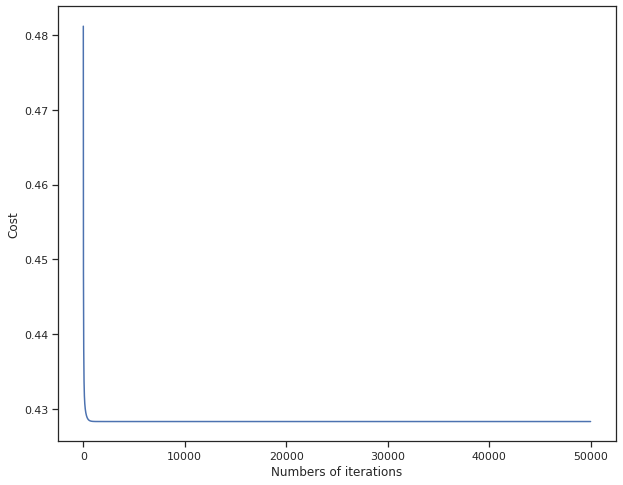

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 0.001 

Cost Function converges at 7 

Model Cost 0.3736753627909421 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


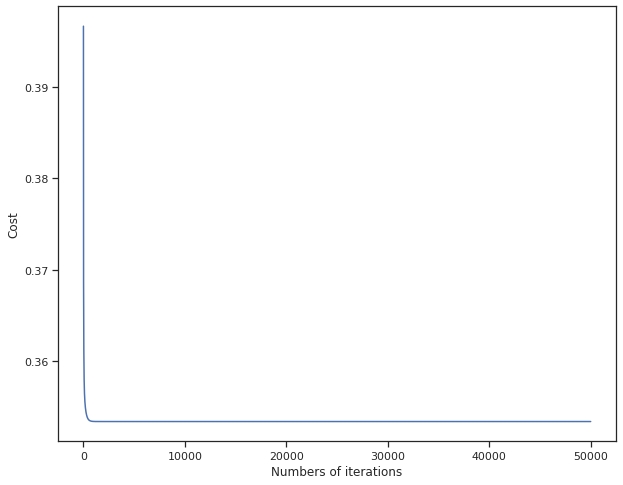

In [70]:
# for different threshold levels

def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  lista = [0.001];
  cost2 = []

  for k in lista:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost2.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_tra1 = devlinearmodel_1(x1_train, y1_train)
linearmodel_tea1 = devlinearmodel_1(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 0.0001 

Cost Function converges at 66 

Model Cost 0.43423734441180656 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


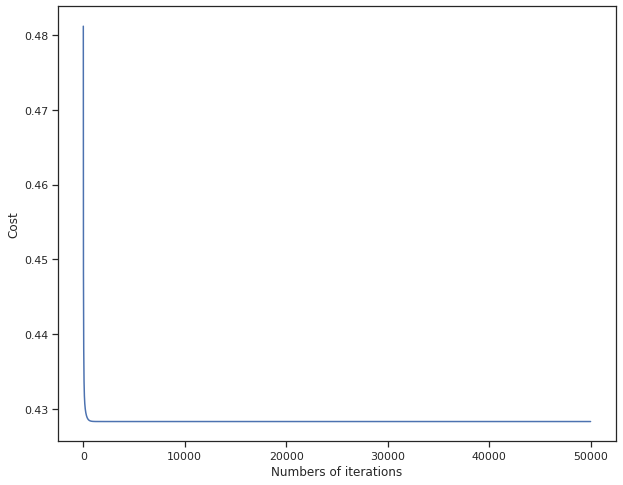

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 0.0001 

Cost Function converges at 54 

Model Cost 0.3592120156169626 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


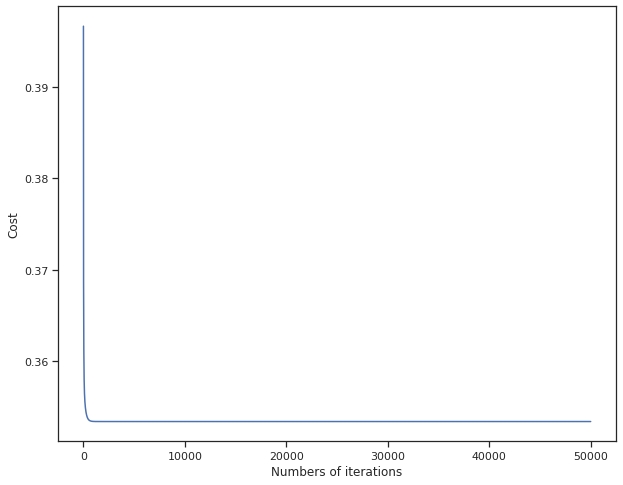

In [71]:
# for different threshold levels

def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  lista = [0.0001];
  cost2 = []

  for k in lista:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost2.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_trb1 = devlinearmodel_1(x1_train, y1_train)
linearmodel_teb1 = devlinearmodel_1(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 0.0001 

Cost Function converges at 66 

Model Cost 0.43423734441180656 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


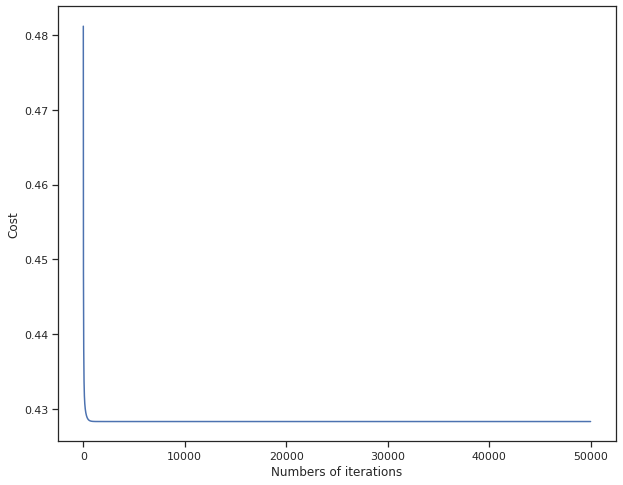

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 0.0001 

Cost Function converges at 54 

Model Cost 0.3592120156169626 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


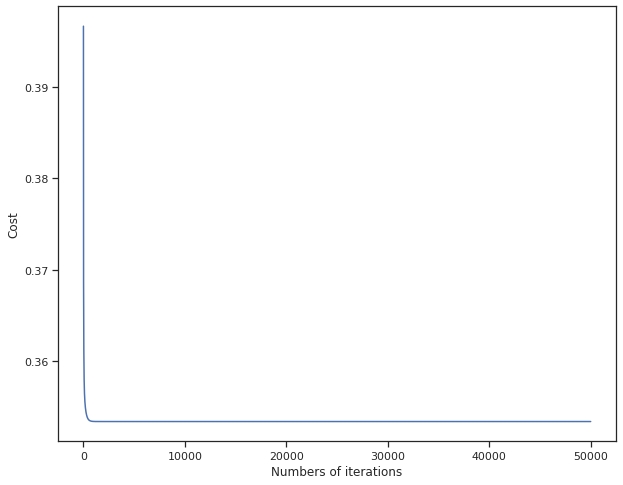

In [72]:
# for different threshold levels

def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  lista = [0.0001];
  cost2 = []

  for k in lista:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost2.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_trc1 = devlinearmodel_1(x1_train, y1_train)
linearmodel_tec1 = devlinearmodel_1(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-05 

Cost Function converges at 209 

Model Cost 0.4298216639464297 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


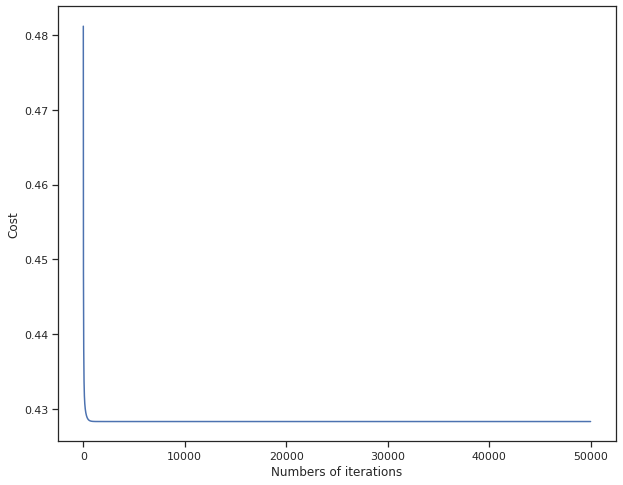

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-05 

Cost Function converges at 197 

Model Cost 0.35488535044999775 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


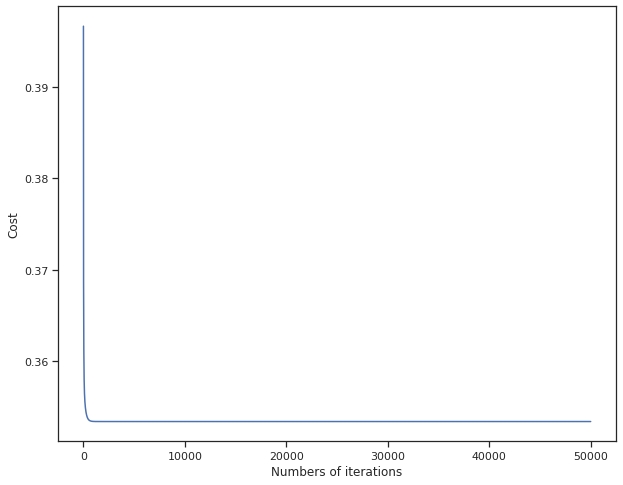

In [73]:
# for different threshold levels

def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  lista = [0.00001];
  cost2 = []

  for k in lista:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost2.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_trd1 = devlinearmodel_1(x1_train, y1_train)
linearmodel_ted1 = devlinearmodel_1(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-06 

Cost Function converges at 568 

Model Cost 0.4284884240766433 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


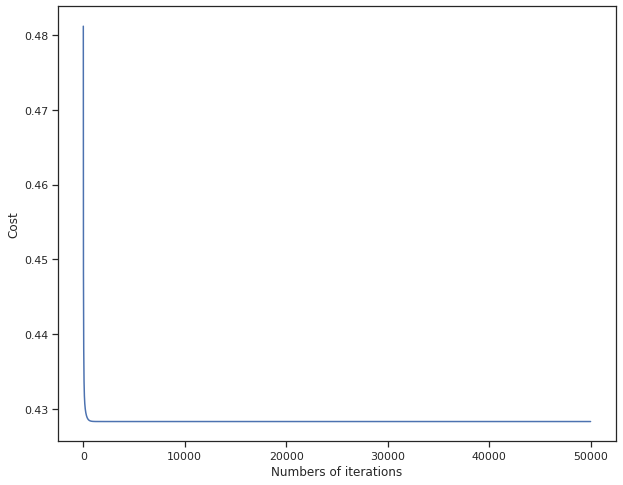

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-06 

Cost Function converges at 547 

Model Cost 0.35356291286805686 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


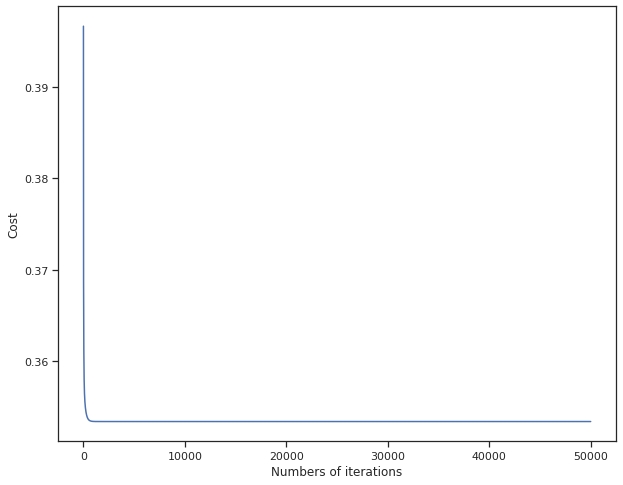

In [74]:
# for different threshold levels

def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  lista = [0.000001];
  cost2 = []

  for k in lista:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost2.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_tre1 = devlinearmodel_1(x1_train, y1_train)
linearmodel_tee1 = devlinearmodel_1(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 949 

Model Cost 0.4283398522552198 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


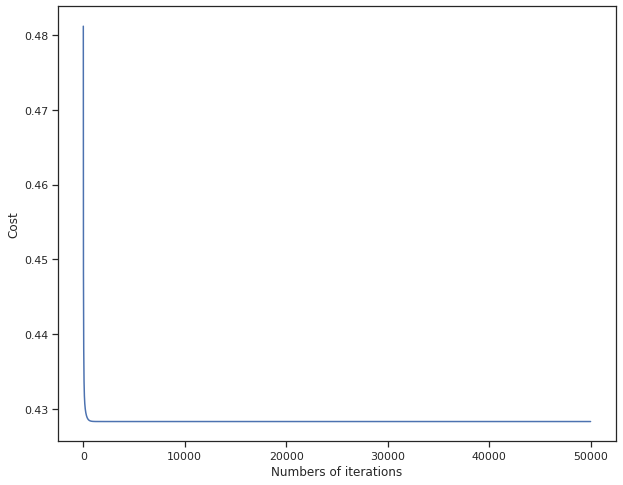

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 912 

Model Cost 0.3534201546664343 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


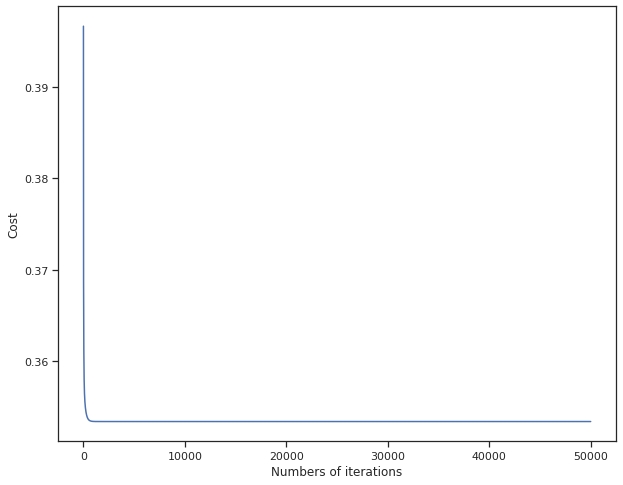

In [75]:
# for different threshold levels

def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  lista = [0.0000001];
  cost2 = []

  for k in lista:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost2.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_trf1 = devlinearmodel_1(x1_train, y1_train)
linearmodel_tef1 = devlinearmodel_1(x1_test, y1_test)

In [76]:
predictedtarget_tea1 = predict(x1_test, linearmodel_tea1)
predictedtarget_teb1 = predict(x1_test, linearmodel_teb1)
predictedtarget_tec1 = predict(x1_test, linearmodel_tec1)
predictedtarget_ted1 = predict(x1_test, linearmodel_ted1)
predictedtarget_tee1 = predict(x1_test, linearmodel_tee1)

modelMSE_tea1 = calcMSE(y1_test, predictedtarget_tea1)
modelMSE_teb1 = calcMSE(y1_test, predictedtarget_teb1)
modelMSE_tec1 = calcMSE(y1_test, predictedtarget_tec1)
modelMSE_ted1 = calcMSE(y1_test, predictedtarget_ted1)
modelMSE_tee1 = calcMSE(y1_test, predictedtarget_tee1)

In [77]:
print('Model MSE Test1 for threshold 0.001:', modelMSE_tea1, '\n')
print('Model MSE Test2 for threshold 0.0001:', modelMSE_teb1, '\n')
print('Model MSE Test3 for threshold 0.00001:', modelMSE_tec1, '\n')
print('Model MSE Test4 for threshold 0.000001:', modelMSE_ted1, '\n')
print('Model MSE Test5 for threshold 0.0000001:', modelMSE_tee1, '\n')

Model MSE Test1 for threshold 0.001: [0.7068085] 

Model MSE Test2 for threshold 0.0001: [0.7068085] 

Model MSE Test3 for threshold 0.00001: [0.7068085] 

Model MSE Test4 for threshold 0.000001: [0.7068085] 

Model MSE Test5 for threshold 0.0000001: [0.7068085] 



In [78]:
predictedtarget_tra1 = predict(x1_train, linearmodel_tra1)
predictedtarget_trb1 = predict(x1_train, linearmodel_trb1)
predictedtarget_trc1 = predict(x1_train, linearmodel_trc1)
predictedtarget_trd1 = predict(x1_train, linearmodel_trd1)
predictedtarget_tre1 = predict(x1_train, linearmodel_tre1)

modelMSE_tra1 = calcMSE(y1_train, predictedtarget_tra1)
modelMSE_trb1 = calcMSE(y1_train, predictedtarget_trb1)
modelMSE_trc1 = calcMSE(y1_train, predictedtarget_trc1)
modelMSE_trd1 = calcMSE(y1_train, predictedtarget_trd1)
modelMSE_tre1 = calcMSE(y1_train, predictedtarget_tre1)

In [79]:
print('Model MSE Train1 for threshold 0.001:', modelMSE_tra1, '\n')
print('Model MSE Train2 for threshold 0.0001:', modelMSE_trb1, '\n')
print('Model MSE Train3 for threshold 0.00001:', modelMSE_trc1, '\n')
print('Model MSE Train4 for threshold 0.000001:', modelMSE_trd1, '\n')
print('Model MSE Train5 for threshold 0.0000001:', modelMSE_tre1, '\n')

Model MSE Train1 for threshold 0.001: [0.85664635] 

Model MSE Train2 for threshold 0.0001: [0.85664635] 

Model MSE Train3 for threshold 0.00001: [0.85664635] 

Model MSE Train4 for threshold 0.000001: [0.85664635] 

Model MSE Train5 for threshold 0.0000001: [0.85664635] 



In [80]:
modelR1_tra1 = modelRsquared(y1_train, predictedtarget_tra1)
modelR1_trb1 = modelRsquared(y1_train, predictedtarget_trb1)
modelR1_trc1 = modelRsquared(y1_train, predictedtarget_trc1)
modelR1_trd1 = modelRsquared(y1_train, predictedtarget_trd1)
modelR1_tre1 = modelRsquared(y1_train, predictedtarget_tre1)

In [81]:
print('Model R_Squared for Train: ', '\n', modelR1_tra1, '\n', modelR1_trb1, '\n', modelR1_trc1, '\n', modelR1_trd1, '\n', modelR1_tre1, '\n')

Model R_Squared for Train:  
 0.14335364969173814 
 0.14335364969173814 
 0.14335364969173814 
 0.14335364969173814 
 0.14335364969173814 



In [82]:
modelR1_tea1 = modelRsquared(y1_test, predictedtarget_tea1)
modelR1_teb1 = modelRsquared(y1_test, predictedtarget_teb1)
modelR1_tec1 = modelRsquared(y1_test, predictedtarget_tec1)
modelR1_ted1 = modelRsquared(y1_test, predictedtarget_ted1)
modelR1_tee1 = modelRsquared(y1_test, predictedtarget_tee1)

In [83]:
print('Model R_Squared for Test: ', '\n', modelR1_tea1, '\n', modelR1_teb1, '\n', modelR1_tec1, '\n', modelR1_ted1, '\n', modelR1_tee1, '\n')

Model R_Squared for Test:  
 0.14179755593582466 
 0.14179755593582466 
 0.14179755593582466 
 0.14179755593582466 
 0.14179755593582466 



In [84]:
feature_b = ['T1', 'T2', 'T5', 'T7', 'T8', 'RH_2', 'RH_4', 'RH_5', 'Windspeed', 'Tdewpoint']
feature_b1 = drop_df[feature_b]
target_3 = drop_df[appliance]

In [85]:
x3_train, x3_test, y3_train, y3_test = train_test_split(feature_b1, target_3, test_size = 0.2, random_state = 0)

In [86]:
x3_train = scaler.fit_transform(x3_train)
x3_test = scaler.transform(x3_test)
y3_train = scaler.fit_transform(y3_train)
y3_test = scaler.transform(y3_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 397 

Model Cost 0.4796868356031643 

Model Coefficients: 
[[-0.18199155  0.42204893 -0.12748767 -0.08359056  0.17921167  0.13868468
  -0.09321691 -0.00100036  0.08907637 -0.10776111]]
alpha: 0.2


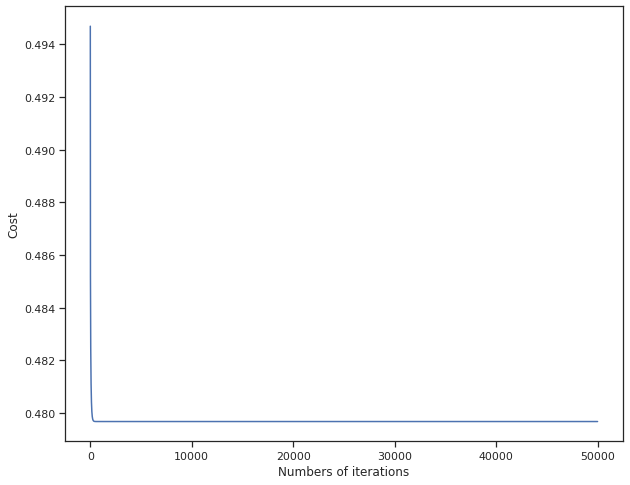

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 403 

Model Cost 0.397998061772192 

Model Coefficients: 
[[-0.10913281  0.36476141 -0.08749865 -0.1550869   0.14671212  0.15826432
  -0.16222742  0.01524872  0.08916751 -0.0474699 ]]
alpha: 0.2


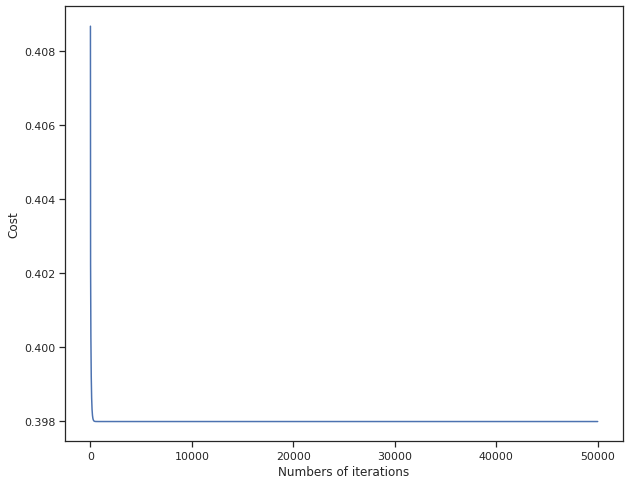

In [87]:
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_b = devlinearmodel(x3_train, y3_train)
linearmodel_b1 = devlinearmodel(x3_test, y3_test)

In [88]:
predictedtarget_b = predict(x3_train, linearmodel_b)
modelMSE_b = calcMSE(y3_train, predictedtarget_b)
print('Model MSE Train:', modelMSE_b, '\n')
modelR2_b = modelRsquared(y3_train, predictedtarget_b)
print('Model R-Squared for Train:', modelR2_b)

Model MSE Train: [0.95936184] 

Model R-Squared for Train: 0.040638161211579815


In [89]:
predictedtarget_b1 = predict(x3_test, linearmodel_b1)
modelMSE_b1 = calcMSE(y3_test, predictedtarget_b1)
print('Model MSE Test:', modelMSE_b1, '\n')
modelR2_b1 = modelRsquared(y3_test, predictedtarget_b1)
print('Model R-Squared for Test:', modelR2_b1)

Model MSE Test: [0.79598387] 

Model R-Squared for Test: 0.033521382176913916


In [90]:
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(feature_b1, target_2, test_size = 0.20, random_state = 0)
gb_classi = GradientBoostingClassifier(learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_classi.fit(x_train_l, y_train_l)
print('Learning rate:', learning_rate)
print('Accuracy score train: {0:.3f}'.format(gb_classi.score(x_train_l, y_train_l)))
print('Accuracy score test: {0:.3f}'.format(gb_classi.score(x_test_l, y_test_l)))
predictions = gb_classi.predict(x_test_l)
print('confusion matrix')
print(confusion_matrix(y_test_l, predictions))
print('classification report')
print(classification_report(y_test_l, predictions))

Learning rate: 1.25
Accuracy score train: 0.781
Accuracy score test: 0.731
confusion matrix
[[ 895  620]
 [ 442 1987]]
classification report
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1515
           1       0.76      0.82      0.79      2429

    accuracy                           0.73      3944
   macro avg       0.72      0.70      0.71      3944
weighted avg       0.73      0.73      0.73      3944



In [91]:
drop_df['HL'] = drop_df.Hour*drop_df.lights

In [92]:
feature_c = ['T2','HL', 'T3', 'RH_3', 'RH_8', 'lights', 'Hour', 'T_out', 'RH_out']
feature_c1 = drop_df[feature_c]
target_4 = drop_df[appliance]

In [93]:
feature_c1.head()

,T2,HL,T3,RH_3,RH_8,lights,Hour,T_out,RH_out
date,,,,,,,,,
2016-01-11 17:00:00,19.2,510,19.79,44.730000,48.900000,30,17,6.600000,92.0
2016-01-11 17:10:00,19.2,510,19.79,44.790000,48.863333,30,17,6.483333,92.0
2016-01-11 17:20:00,19.2,510,19.79,44.933333,48.730000,30,17,6.366667,92.0
2016-01-11 17:30:00,19.2,680,19.79,45.000000,48.590000,40,17,6.250000,92.0
2016-01-11 17:40:00,19.2,680,19.79,45.000000,48.590000,40,17,6.133333,92.0


In [94]:
x4_train, x4_test, y4_train, y4_test = train_test_split(feature_c1, target_4, test_size = 0.2, random_state = 0)

In [95]:
x4_train = scaler.fit_transform(x4_train)
x4_test = scaler.transform(x4_test)
y4_train = scaler.fit_transform(y4_train)
y4_test = scaler.transform(y4_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 240 

Model Cost 0.4444100965157158 

Model Coefficients: 
[[-0.05314159 -0.13931022  0.15951366  0.27462298 -0.22290891  0.27562173
   0.13088079 -0.07058637 -0.13520638]]
alpha: 0.2


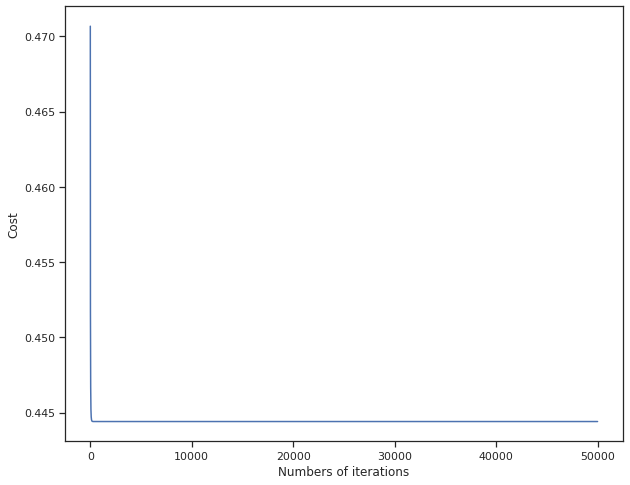

In [96]:
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_c = devlinearmodel(x4_train, y4_train)

Evaluation Metrics

In [97]:
# evaluation metrics

predictedtarget_c = predict(x4_train, linearmodel_c)
modelMSE_c = calcMSE(y4_train, predictedtarget_c)
print('Model MSE train:', modelMSE_c, '\n')
modelR2_c = modelRsquared(y4_train, predictedtarget_c)
print('Model R-Squared for train: ', modelR2_c)

Model MSE train: [0.88881316] 

Model R-Squared for train:  0.11118684331710849


In [98]:
predictedtarget_c1 = predict(x4_test, linearmodel_c)
modelMSE_c1 = calcMSE(y4_test, predictedtarget_c1)
print('Model MSE test:', modelMSE_c1, '\n')
modelR2_c1 = modelRsquared(y4_test, predictedtarget_c1)
print('Model R-Squared for test: ', modelR2_c1)

Model MSE test: [0.73847708] 

Model R-Squared for test:  0.10334577285417268


In [99]:
x_train_lc, x_test_lc, y_train_lc, y_test_lc = train_test_split(feature_c1, target_2, test_size = 0.20, random_state = 0)
gb_classi = GradientBoostingClassifier(learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_classi.fit(x_train_lc, y_train_lc)
print('Learning rate:', learning_rate)
print('Accuracy score train: {0:.3f}'.format(gb_classi.score(x_train_lc, y_train_lc)))
print('Accuracy score test: {0:.3f}'.format(gb_classi.score(x_test_lc, y_test_lc)))
predictions = gb_classi.predict(x_test_lc)
print('confusion matrix')
print(confusion_matrix(y_test_lc, predictions))
print('classification report')
print(classification_report(y_test_lc, predictions))

Learning rate: 1.25
Accuracy score train: 0.806
Accuracy score test: 0.773
confusion matrix
[[1032  483]
 [ 412 2017]]
classification report
              precision    recall  f1-score   support

           0       0.71      0.68      0.70      1515
           1       0.81      0.83      0.82      2429

    accuracy                           0.77      3944
   macro avg       0.76      0.76      0.76      3944
weighted avg       0.77      0.77      0.77      3944



In [100]:

feature_d = temperature + humidity + lights + hour + random
feature_d1 = drop_df[feature_d]
target_5 = drop_df[appliance]

In [101]:
x5_train, x5_test, y5_train, y5_test = train_test_split(feature_d1, target_5, test_size = 0.2, random_state = 0)

In [102]:
x5_train = scaler.fit_transform(x5_train)
x5_test = scaler.transform(x5_test)
y5_train = scaler.fit_transform(y5_train)
y5_test = scaler.transform(y5_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 786 

Model Cost 0.41677995459825873 

Model Coefficients: 
[[-0.08346074 -0.31785204  0.51224749 -0.09236495 -0.03754458  0.13590613
   0.03153467  0.13491673 -0.23570823  0.56695753 -0.50870242  0.15169326
  -0.02737489  0.00954094  0.07634422 -0.09823243 -0.21483163 -0.00589781
   0.15200279  0.06195765 -0.00140526 -0.00140526]]
alpha: 0.2


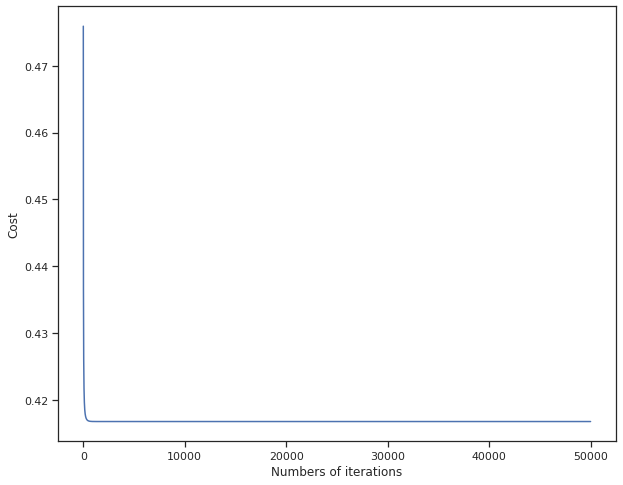

In [103]:
def devlinearmodel_1(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_d = devlinearmodel(x5_train, y5_train)

In [104]:
predictedtarget_d = predict(x5_train, linearmodel_d)
modelMSE_d = calcMSE(y5_train, predictedtarget_d)
print('Model MSE train:', modelMSE_d, '\n')
modelR2_d = modelRsquared(y5_train, predictedtarget_d)
print('Model R-Squared for train: ', modelR2_d)

Model MSE train: [0.83352768] 

Model R-Squared for train:  0.16647232190883876


In [105]:
predictedtarget_d1 = predict(x5_test, linearmodel_d)
modelMSE_d1 = calcMSE(y5_test, predictedtarget_d1)
print('Model MSE train:', modelMSE_d1, '\n')
modelR2_d1 = modelRsquared(y5_test, predictedtarget_d1)
print('Model R-Squared for train: ', modelR2_d1)

Model MSE train: [0.6992184] 

Model R-Squared for train:  0.15101340753171255


In [106]:
x_train_ld, x_test_ld, y_train_ld, y_test_ld = train_test_split(feature_d1, target_2, test_size = 0.20, random_state = 0)
gb_classi = GradientBoostingClassifier(learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_classi.fit(x_train_ld, y_train_ld)
print('Learning rate:', learning_rate)
print('Accuracy score train: {0:.3f}'.format(gb_classi.score(x_train_ld, y_train_ld)))
print('Accuracy score test: {0:.3f}'.format(gb_classi.score(x_test_ld, y_test_ld)))
predictions = gb_classi.predict(x_test_ld)
print('confusion matrix')
print(confusion_matrix(y_test_ld, predictions))
print('classification report')
print(classification_report(y_test_ld, predictions))

Learning rate: 1.25
Accuracy score train: 0.828
Accuracy score test: 0.787
confusion matrix
[[1074  441]
 [ 401 2028]]
classification report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1515
           1       0.82      0.83      0.83      2429

    accuracy                           0.79      3944
   macro avg       0.77      0.77      0.77      3944
weighted avg       0.79      0.79      0.79      3944



Trying other regression model

In [107]:
# seperate dependent and independent variables
feature_r = temperature + humidity + weather + random
feature_R = drop_df[feature_r]
target_R = drop_df[appliance]

In [108]:
# take subpart of the data for analysis it has large dataset and was very slow.

a = feature_R.iloc[:1200,:]
b = target_R.iloc[:1200,:]
scaler = StandardScaler()
a= scaler.fit_transform(a)

In [109]:
x_trainR, x_testR, y_trainR, y_testR = train_test_split(a, b, random_state=0)

Ridge Regression

In [110]:
# ridge

ridge = Ridge()
param = {'alpha':[0.01, 0.1, 1, 5, 10, 20, 30, 50]}
ridge_regressor = GridSearchCV(ridge, param, cv=10, return_train_score=True)
ridge_regressor.fit(x_trainR, y_trainR)
ridge_regressor.score(x_testR, y_testR)

0.1370999342996575

In [111]:
ridge_train_score_list = ridge_regressor.cv_results_['mean_train_score']
print(f'Train score across different alpha is: {ridge_train_score_list}')
ridge_test_score_list = ridge_regressor.cv_results_['mean_test_score']
print(f'\nTest score across different alpha is: {ridge_test_score_list}')

Train score across different alpha is: [0.25144838 0.25055341 0.24528778 0.23477538 0.22494715 0.21087917
 0.20071775 0.18636651]

Test score across different alpha is: [0.16327208 0.16317624 0.16129841 0.15889472 0.1541223  0.14573815
 0.13911369 0.12946031]


Best parameter for ridge regression is: {'alpha': 0.01}
Average training score for ridge regression model using 10fold CV is : 0.22562194101227365
Average testing score for ridge regression model using 10fold CV is : 0.151884487591406


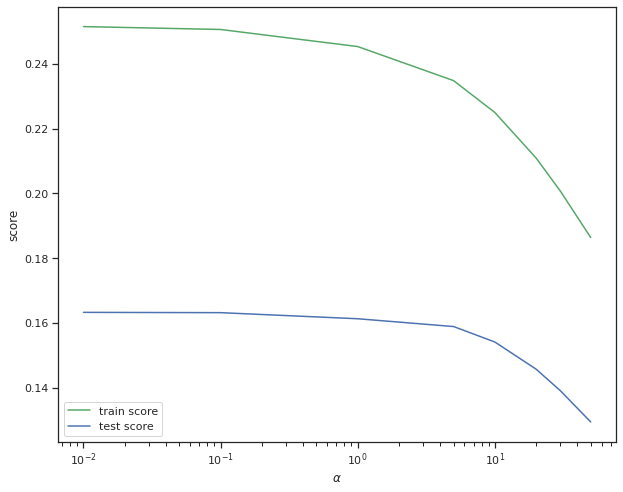

In [112]:
# visualization of the results
x_range = [0.01, 0.1, 1, 5, 10, 20, 30, 50]
plt.plot(x_range, ridge_train_score_list, c= 'g', label = 'train score')
plt.plot(x_range, ridge_test_score_list, c = 'b', label = 'test score')
plt.xscale('log')
plt.legend(loc=3)
plt.xlabel(r'$\alpha$')
plt.ylabel('score')

print(f'Best parameter for ridge regression is: {ridge_regressor.best_params_}')
print(f'Average training score for ridge regression model using 10fold CV is : {((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for ridge regression model using 10fold CV is : {((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')

In [113]:
# final model with best param with root mean squared error(RMSE) as scoring matrics
ridge_final = Ridge(alpha = 50)
ridge_final.fit(x_trainR, y_trainR)
ridge_final_train_scores = cross_val_score(ridge_final, x_trainR, y_trainR, cv=10, scoring = 'neg_mean_squared_error')
ridge_final_test_scores = cross_val_score(ridge_final, x_testR, y_testR, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Ridge Regression model using 10 fold CV is: {ridge_final_train_scores.mean()}')
print(f'Test RMSE for best Ridge Regression model using 10 fold CV is: {ridge_final_test_scores.mean()}')

Train RMSE for best Ridge Regression model using 10 fold CV is: -13671.981562649002
Test RMSE for best Ridge Regression model using 10 fold CV is: -16923.412787737594


Lasso Regression

In [114]:
# lasso regression
lasso = Lasso()
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5]}
lasso_regressor = GridSearchCV(lasso, param, cv=10, return_train_score=True)
lasso_regressor.fit(x_trainR, y_trainR)
lasso_regressor.score(x_testR, y_testR)

0.12847488847250932

In [115]:
lasso_train_score_list = lasso_regressor.cv_results_['mean_train_score']
print(f'Train score across different alpha is: {lasso_train_score_list}')
lasso_test_score_list = lasso_regressor.cv_results_['mean_test_score']
print(f'Test score across different alpha is: {lasso_test_score_list}')

Train score across different alpha is: [0.24833161 0.24830649 0.24804214 0.24440255 0.20322576 0.11480057]
Test score across different alpha is: [0.16021955 0.1602197  0.16021483 0.15946603 0.13882294 0.07704178]


Best Parameter for Lassp regression is: {'alpha': 0.001}
Average training score for Lasso regression model using 10fold CV is : 0.21785151805571992
Average testing score for Lasso regression model using 10fold CV is : 0.14266413805409284


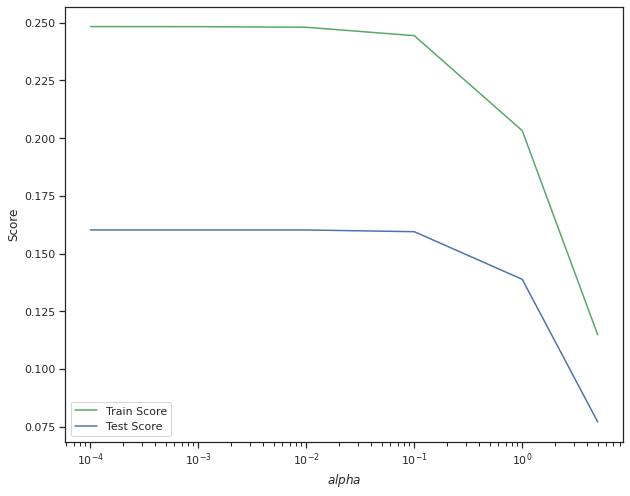

In [116]:
# plot the results
x_range = [0.0001, 0.001, 0.01, 0.1, 1, 5]
plt.plot(x_range, lasso_train_score_list, c='g', label ='Train Score')
plt.plot(x_range, lasso_test_score_list, c='b', label ='Test Score')
plt.xscale('log')
plt.legend(loc=3)
plt.xlabel(r'$alpha$')
plt.ylabel('Score')

print(f'Best Parameter for Lassp regression is: {lasso_regressor.best_params_}')
print(f'Average training score for Lasso regression model using 10fold CV is : {((lasso_train_score_list).sum())/len(x_range)}')
print(f'Average testing score for Lasso regression model using 10fold CV is : {((lasso_test_score_list).sum())/len(x_range)}')

In [117]:
# final model with best param with root mean squared error(RMSE) as scoring matrics
lasso_final = Lasso(alpha = 50)
lasso_final.fit(x_trainR, y_trainR)
lasso_final_train_scores = cross_val_score(lasso_final, x_trainR, y_trainR, cv=10, scoring = 'neg_mean_squared_error')
lasso_final_test_scores = cross_val_score(lasso_final, x_testR, y_testR, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Lasso Regression model using 10 fold CV is: {lasso_final_train_scores.mean()}')
print(f'Test RMSE for best Lasso Regression model using 10 fold CV is: {lasso_final_test_scores.mean()}')

Train RMSE for best Lasso Regression model using 10 fold CV is: -15960.881740588326
Test RMSE for best Lasso Regression model using 10 fold CV is: -18248.385322359398


Polynomial Regression

In [118]:
# polynomial
linreg = LinearRegression()
train_score_list = []
test_score_list = []

for i in [1, 2, 3]:
  poly = PolynomialFeatures(i)
  x_train_poly = poly.fit_transform(x_trainR)
  linreg.fit(x_train_poly, y_trainR)
  train_scores = cross_val_score(linreg, x_train_poly, y_trainR, cv=10)
  test_scores = cross_val_score(linreg, x_testR, y_testR, cv=10)
  train_score_list.append(train_scores)
  test_score_list.append(test_scores)

In [119]:
poly_train_score_list1 = []
poly_test_score_list1 = []

for n in [0, 1, 2]:
  poly_train_score_list = train_score_list[n].sum()/len(train_score_list[n])
  poly_train_score_list1.append(poly_train_score_list)
  poly_test_score_list = test_score_list[n].sum()/len(test_score_list[n])
  poly_test_score_list1.append(poly_test_score_list)

In [120]:
print('Best score comes from Degree 2')
print(f'Average Train score across different params is: {poly_train_score_list1}')
print(f'Average Test score across different params is : {poly_test_score_list1}')

Best score comes from Degree 2
Average Train score across different params is: [0.1631348683106753, 0.3498052390817807, -2.9857109056129243]
Average Test score across different params is : [0.014843064285002016, 0.014843064285002016, 0.014843064285002016]


Text(0, 0.5, 'Score')

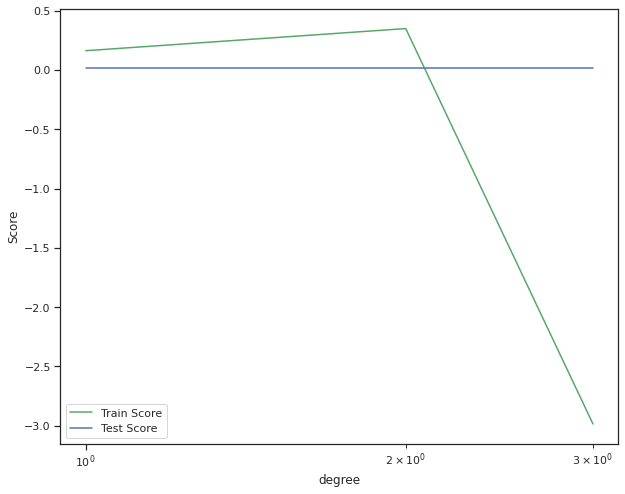

In [121]:
x_range = [1, 2, 3]
plt.plot(x_range, poly_train_score_list1, c='g', label='Train Score')
plt.plot(x_range, poly_test_score_list1, c='b', label='Test Score')
plt.xscale('log')
plt.legend(loc=3)
plt.xlabel(r'degree')
plt.ylabel('Score')

In [122]:
poly_final = PolynomialFeatures(degree=2)
x_train_poly_final = poly_final.fit_transform(x_trainR)
poly_final.fit(x_train_poly_final, y_trainR)
linreg.fit(x_train_poly_final, y_trainR)
poly_final_train_scores = cross_val_score(linreg, x_train_poly_final, y_trainR, cv=10, scoring = 'neg_mean_squared_error')
poly_final_test_scores = cross_val_score(linreg, x_testR, y_testR, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Poly Regression model using 10 fold CV is: {poly_final_train_scores.mean()}')
print(f'Test RMSE for best Poly Regression model using 10 fold CV is: {poly_final_test_scores.mean()}')

Train RMSE for best Poly Regression model using 10 fold CV is: -9285.048164103864
Test RMSE for best Poly Regression model using 10 fold CV is: -16302.651455106989


Logistic Regression

In [123]:
# logistic regression
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 5]
hyperparameters = dict(C=C, penalty=penalty)
logistic = LogisticRegression()
logistic_regressor = GridSearchCV(logistic, hyperparameters, cv=10, return_train_score=True)
logistic_regressor.fit(x_trainR, y_trainR)
logistic_regressor.score(x_testR, y_testR)

0.29

In [124]:
logistic_regressor_train_score_list = logistic_regressor.cv_results_['mean_train_score']
print(f'Train score across different params is: {logistic_regressor_train_score_list}')
logistic_regressor_test_score_list = logistic_regressor.cv_results_['mean_test_score']
print(f'Test score across different params is: {logistic_regressor_test_score_list}')

Train score across different params is: [       nan 0.23493827        nan 0.27024691        nan 0.31790123
        nan 0.37037037        nan 0.4137037 ]
Test score across different params is: [       nan 0.23              nan 0.24555556        nan 0.27555556
        nan 0.27444444        nan 0.25888889]


In [125]:
print(f'Best parameter for Logistic regression is: {logistic_regressor.best_params_}')
print(f'Average training score for Logistic Regression model using 10 fold CV is: {(logistic_regressor_train_score_list.sum())/len(logistic_regressor_train_score_list)}')
print(f'Average testing score for Logistic Regression model using 10 fold CV is: {(logistic_regressor_test_score_list.sum())/len(logistic_regressor_test_score_list)}')

Best parameter for Logistic regression is: {'C': 0.1, 'penalty': 'l2'}
Average training score for Logistic Regression model using 10 fold CV is: nan
Average testing score for Logistic Regression model using 10 fold CV is: nan


Decision Tree

In [126]:
tree = DecisionTreeRegressor()
param_grid = [{'splitter': ['best', 'random'], 'max_depth': np.arange(5,12), 'max_features': [4,5,8,10]}]
tree_regressor = GridSearchCV(tree, param_grid, cv=5, return_train_score =True)

In [127]:
tree_regressor.fit(x_trainR, y_trainR)
tree_regressor.score(x_testR, y_testR)

0.35331298500109454

In [128]:
tree_test_score_list = tree_regressor.cv_results_['mean_test_score']
print(f'Test score across different alpha is: {tree_test_score_list}')
tree_train_score_list = tree_regressor.cv_results_['mean_train_score']
print(f'\nTrain score across different alpha is: {tree_train_score_list}')

Test score across different alpha is: [0.13653026 0.05455374 0.04851541 0.15174669 0.03105666 0.11828301
 0.13895332 0.05770886 0.24272843 0.12027749 0.08004889 0.12494055
 0.10303901 0.13314802 0.03826264 0.15415773 0.10380503 0.20304031
 0.22154364 0.12269042 0.16606431 0.04096146 0.15300076 0.1762586
 0.17108798 0.1051113  0.17122164 0.109616   0.17627912 0.17271449
 0.22523166 0.1518128  0.18413619 0.11893143 0.03417598 0.12270839
 0.08934335 0.14573656 0.13237232 0.14441486 0.15864562 0.23112213
 0.14129057 0.26584742 0.24018869 0.13131068 0.20183722 0.06405012
 0.14559011 0.01942516 0.25144336 0.11604979 0.23644989 0.19534679
 0.20722416 0.18907447]

Train score across different alpha is: [0.40956432 0.23157359 0.34297567 0.23185559 0.4092885  0.27236242
 0.45456082 0.30041169 0.50058012 0.31866076 0.51864627 0.32629115
 0.51858944 0.35928496 0.48421719 0.37292651 0.63046297 0.36327651
 0.61810092 0.44235079 0.65312477 0.47417767 0.70144966 0.48572662
 0.69545487 0.48551702 0.673

In [129]:
print(f'Best parameter for Decision tree regression is: {tree_regressor.best_params_}')
print(f'Average training score for Decision Tree regression model using 10Fold CV is: {(tree_train_score_list.sum())/len(tree_train_score_list)}')
print(f'Average testing score for Decision Tree regression model using 10Fold CV is: {(tree_test_score_list.sum())/len(tree_test_score_list)}')

Best parameter for Decision tree regression is: {'max_depth': 10, 'max_features': 5, 'splitter': 'random'}
Average training score for Decision Tree regression model using 10Fold CV is: 0.6004808874360348
Average testing score for Decision Tree regression model using 10Fold CV is: 0.142341169344083


In [130]:
# Decision Tree Regressor model with best estimator found from above analysis
tree_final = DecisionTreeRegressor(max_depth=10, max_features=8, splitter='random')
tree_final.fit(x_trainR, y_trainR)
tree_final_train_score = cross_val_score(tree_final, x_trainR, y_trainR, cv=10, scoring= 'neg_mean_squared_error')
tree_final_test_score = cross_val_score(tree_final, x_testR, y_testR, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Decision Tree Regression model using 10 Fold CV is: {tree_final_train_score.mean()}')
print(f'Test RMSE for best Decision Tree Regression model using 10 Fold CV is: {tree_final_test_score.mean()}')

Train RMSE for best Decision Tree Regression model using 10 Fold CV is: -13978.65661073007
Test RMSE for best Decision Tree Regression model using 10 Fold CV is: -21533.789752273384
